In [1]:
#import appropriate packages

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
start = time.time()
import numpy
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import StratifiedShuffleSplit

#deep learning
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import EarlyStopping
import torch
from torch import nn
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.impute import SimpleImputer

# ETL

# Dataset 1 - COLET

In [2]:
#obtain wd - note all folders/files will need to be in here 

path = os.getcwd()
files = os.listdir()
files

['.ipynb_checkpoints',
 '10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '15.csv',
 '16.csv',
 '17.csv',
 '2.csv',
 '20.csv',
 '2023_assignment2_SIT744 (1).ipynb',
 '21.csv',
 '22.csv',
 '220477645_SIT744_A2_SOLUTION.ipynb',
 '23.csv',
 '24.csv',
 '25.csv',
 '26.csv',
 '27.csv',
 '28.csv',
 '29.csv',
 '3.csv',
 '30.csv',
 '31.csv',
 '32.csv',
 '33.csv',
 '34.csv',
 '35.csv',
 '36.csv',
 '37.csv',
 '38.csv',
 '39.csv',
 '4.csv',
 '40.csv',
 '41.csv',
 '42.csv',
 '43.csv',
 '44.csv',
 '45.csv',
 '46.csv',
 '47.csv',
 '48.csv',
 '49.csv',
 '5.csv',
 '50.csv',
 '51.csv',
 '52.csv',
 '53.csv',
 '54.csv',
 '55.csv',
 '56.csv',
 '57.csv',
 '58.csv',
 '59.csv',
 '6.csv',
 '60.csv',
 '61.csv',
 '62.csv',
 '63.csv',
 '64.csv',
 '65.csv',
 '66.csv',
 '67.csv',
 '68.csv',
 '69.csv',
 '7.csv',
 '8.csv',
 '9.csv',
 'AHALLAM_220477645_SIT744_assignment1_solution.ipynb',
 'fixation_finale.txt',
 'SIT723v1.ipynb',
 'SIT724v1.ipynb',
 'SIT724v2.ipynb',
 'SIT724v3.ipynb',
 'SIT744_prac_2_colab.ipyn

In [3]:
#extract all excel files 

#IMPORTANT - MAKE SURE THE COLUMN HEADERS IN THE FIRST FILE ARE ALL THERE OTHERWISE THERE WILL BE ISSUES LATER ON!

files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Task1_Subject_1.xlsx',
 'Task1_Subject_10.xlsx',
 'Task1_Subject_11.xlsx',
 'Task1_Subject_12.xlsx',
 'Task1_Subject_13.xlsx',
 'Task1_Subject_14.xlsx',
 'Task1_Subject_15.xlsx',
 'Task1_Subject_16.xlsx',
 'Task1_Subject_17.xlsx',
 'Task1_Subject_18.xlsx',
 'Task1_Subject_19.xlsx',
 'Task1_Subject_2.xlsx',
 'Task1_Subject_20.xlsx',
 'Task1_Subject_21.xlsx',
 'Task1_Subject_22.xlsx',
 'Task1_Subject_23.xlsx',
 'Task1_Subject_24.xlsx',
 'Task1_Subject_25.xlsx',
 'Task1_Subject_26.xlsx',
 'Task1_Subject_27.xlsx',
 'Task1_Subject_28.xlsx',
 'Task1_Subject_29.xlsx',
 'Task1_Subject_3.xlsx',
 'Task1_Subject_30.xlsx',
 'Task1_Subject_31.xlsx',
 'Task1_Subject_32.xlsx',
 'Task1_Subject_33.xlsx',
 'Task1_Subject_34.xlsx',
 'Task1_Subject_35.xlsx',
 'Task1_Subject_36.xlsx',
 'Task1_Subject_37.xlsx',
 'Task1_Subject_38.xlsx',
 'Task1_Subject_39.xlsx',
 'Task1_Subject_4.xlsx',
 'Task1_Subject_40.xlsx',
 'Task1_Subject_41.xlsx',
 'Task1_Subject_42.xlsx',
 'Task1_Subject_43.xlsx',
 'Task1_Subject_

In [4]:
#blank dataframe to write to 
#we need one of these for each record type (i.e. 16) otherwise we are appending to differing columns
c_gaze_task1 = pd.DataFrame()
c_gaze_task2 = pd.DataFrame()
c_gaze_task3 = pd.DataFrame()
c_gaze_task4 = pd.DataFrame()
c_pupil_task1 = pd.DataFrame()
c_pupil_task2 = pd.DataFrame()
c_pupil_task3 = pd.DataFrame()
c_pupil_task4 = pd.DataFrame()
c_blinks_task1 = pd.DataFrame()
c_blinks_task2 = pd.DataFrame()
c_blinks_task3 = pd.DataFrame()
c_blinks_task4 = pd.DataFrame()
c_annotation_task1 = pd.DataFrame()
c_annotation_task2 = pd.DataFrame()
c_annotation_task3 = pd.DataFrame()
c_annotation_task4 = pd.DataFrame()

In [5]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg1 = []  

for f in files_xlsx:
    data1 = pd.read_excel(f, sheet_name=0)
    data1['file'] = f
    df_cg1.append(data1)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task1 = pd.concat(df_cg1)

In [6]:
c_gaze_task1 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.235298,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,228321.640550,203,0.998400,0.475380,0.631670,'228321.642057-0 228321.63904299997-1',-4.361516,-23.527886,139.372822,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.193580,-0.186064,0.963279,Task1_Subject_9.xlsx
7278,228321.644953,203,0.999574,0.475981,0.631705,'228321.642057-0 228321.647848-1',-4.185422,-23.313012,138.076497,17.897052,...,-0.130917,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7279,228321.647579,203,0.998621,0.474966,0.631155,'228321.64731099998-0 228321.647848-1',-4.383473,-23.081466,137.119705,17.897052,...,-0.132854,-0.241547,0.961252,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx
7280,228321.650594,203,0.999000,0.476239,0.634307,'228321.65333899998-0 228321.647848-1',-4.132822,-23.675728,138.214746,17.897052,...,-0.130390,-0.245527,0.960581,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx


In [7]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg2 = []  

for f in files_xlsx:
    data2 = pd.read_excel(f, sheet_name = 1)
    data2['file'] = f
    df_cg2.append(data2)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task2 = pd.concat(df_cg2)

In [8]:
c_gaze_task2

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4659.168013,0,0.999946,0.467168,0.841347,'4659.1660919999995-0 4659.169934-1',-3.465714,-28.025541,73.689623,19.490548,...,-0.216004,-0.404146,0.888824,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
1,4659.171724,0,0.999934,0.467982,0.841412,'4659.173514-0 4659.169934-1',-3.374369,-28.127372,73.947970,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
2,4659.175874,0,0.999912,0.467992,0.841952,'4659.173514-0 4659.178234999999-1',-3.372870,-28.163546,73.927925,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
3,4659.179746,0,0.999956,0.467042,0.841566,'4659.181258-0 4659.178234999999-1',-3.479495,-28.023615,73.637258,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
4,4659.183226,0,0.999976,0.467126,0.841238,'4659.181258-0 4659.185194-1',-3.466174,-27.978763,73.589596,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313692,-0.383646,0.868569,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,228504.268961,169,0.556724,0.481309,0.600110,'228504.268961-0',-8.319053,-53.813592,386.637142,199.196377,...,-0.415031,0.068077,0.907257,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5401,228504.277133,170,0.532541,0.455582,0.613673,'228504.277133-0',-24.112588,-57.702254,379.354003,199.196377,...,-0.446618,0.060300,0.892691,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
5402,228504.279693,170,0.997051,0.457765,0.590002,'228504.284804-0 228504.274583-1',-8.856885,-19.243240,148.062316,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.178785,-0.184018,0.966526,Task1_Subject_9.xlsx
5403,228504.282918,170,0.997780,0.452818,0.595424,'228504.284804-0 228504.28103299998-1',-10.838604,-21.549988,159.535551,20.169042,...,-0.166977,-0.203570,0.964716,-40.120460,14.691800,-20.624819,0.157374,-0.184781,0.970098,Task1_Subject_9.xlsx


In [9]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg3 = []  

for f in files_xlsx:
    data3 = pd.read_excel(f, sheet_name = 2)
    data3['file'] = f
    df_cg3.append(data3)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task3 = pd.concat(df_cg3)   

In [10]:
c_gaze_task3

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4925.733554,0,0.999807,0.455139,0.829161,'4925.733566-0 4925.733541-1',-5.210845,-28.369822,77.211448,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.306528,-0.377348,0.873870,Task1_Subject_1.xlsx
1,4925.737495,0,0.999896,0.455489,0.827894,'4925.733566-0 4925.741424-1',-5.148993,-28.190206,77.013647,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
2,4925.741473,0,0.999911,0.455146,0.828076,'4925.741521999999-0 4925.741424-1',-5.186693,-28.163240,76.895547,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
3,4925.745420,0,0.999885,0.454981,0.828821,'4925.741521999999-0 4925.749317999999-1',-5.215824,-28.258688,76.985009,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
4,4925.749386,0,0.999868,0.454758,0.828875,'4925.749452999999-0 4925.749317999999-1',-5.240436,-28.236476,76.910377,21.275608,...,-0.246163,-0.411530,0.877523,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15190,227926.280984,351,0.999084,0.577568,0.515940,'227926.28500399998-0 227926.27696299998-1',18.936924,-8.713000,140.128402,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.303512,-0.122491,0.944921,Task1_Subject_9.xlsx
15191,227926.285003,352,0.998244,0.579733,0.519930,'227926.28500399998-0 227926.285002-1',19.059397,-9.049177,137.359910,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.309119,-0.131280,0.941919,Task1_Subject_9.xlsx
15192,227926.289027,352,0.996593,0.581765,0.516821,'227926.28500399998-0 227926.293051-1',19.106148,-8.476573,134.455112,21.858422,...,-0.018743,-0.162341,0.986557,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx
15193,227926.293049,352,0.996438,0.582387,0.518000,'227926.29304699998-0 227926.293051-1',19.340557,-8.665963,135.113591,21.858422,...,-0.017040,-0.163435,0.986407,-34.548309,13.134973,-26.263953,0.314391,-0.129470,0.940423,Task1_Subject_9.xlsx


In [11]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cg4 = []  

for f in files_xlsx:
    data4 = pd.read_excel(f, sheet_name = 3)
    data4['file'] = f
    df_cg4.append(data4)

# Concatenate the list of DataFrames into a single DataFrame
c_gaze_task4 = pd.concat(df_cg4)      

In [12]:
c_gaze_task4 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5186.936018,0,0.999910,0.429778,0.894138,'5186.937763-0 5186.934273-1',-7.849854,-30.436482,68.829957,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.276384,-0.423655,0.862629,Task1_Subject_1.xlsx
1,5186.939908,0,0.999884,0.429607,0.893521,'5186.937763-0 5186.942054-1',-7.883667,-30.444688,68.959266,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
2,5186.944288,0,0.999771,0.429758,0.893629,'5186.946523-0 5186.942054-1',-7.869988,-30.470123,68.998894,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
3,5186.947952,0,0.999775,0.429542,0.893677,'5186.946523-0 5186.949380999999-1',-7.913816,-30.541058,69.147955,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
4,5186.951829,0,0.999893,0.430029,0.894655,'5186.954277-0 5186.949380999999-1',-7.868716,-30.663442,69.251569,18.763117,...,-0.254523,-0.445863,0.858152,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16688,222043.332706,272,0.999866,0.515607,0.439272,'222043.33090499998-0 222043.334508-1',3.434937,0.810220,101.123017,19.681803,...,-0.131417,-0.123440,0.983612,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16689,222043.336530,273,0.999767,0.514888,0.438728,'222043.33855199997-0 222043.334508-1',3.305292,0.857062,100.751790,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.327293,-0.097566,0.939872,Task1_Subject_9.xlsx
16690,222043.340519,273,0.999846,0.514192,0.439384,'222043.33855199997-0 222043.34248599998-1',3.213693,0.802417,101.432418,19.681803,...,-0.132847,-0.123353,0.983431,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx
16691,222043.344584,273,0.999875,0.508943,0.436278,'222043.346681-0 222043.34248599998-1',2.293070,1.059562,98.765386,19.681803,...,-0.143193,-0.123958,0.981901,-39.328648,14.802702,-21.524028,0.325053,-0.097289,0.940678,Task1_Subject_9.xlsx


In [13]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt1 = []  

for f in files_xlsx:
    data5 = pd.read_excel(f, sheet_name = 4)
    data5['file'] = f
    df_cpt1.append(data5)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task1 = pd.concat(df_cpt1)      

In [14]:
c_pupil_task1

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5410.553797,0,1.0,1.000000,0.406205,0.708513,40.757561,'2d c++',77.991356,55.965595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,5410.553797,0,1.0,0.999646,0.406235,0.708578,40.764095,'3d c++',77.997212,55.953014,...,-0.714380,1.971798,1.419294,-2.333954,145.942173,79.574077,187.867489,187.867489,90.0,Task1_Subject_1.xlsx
2,5410.557872,0,0.0,0.999661,0.326001,0.395972,38.729047,'3d c++',62.592283,115.973389,...,-0.699703,1.889488,1.768446,-2.346975,134.652012,92.929580,188.411042,188.411042,90.0,Task1_Subject_1.xlsx
3,5410.557872,0,0.0,1.000000,0.325980,0.396084,38.723305,'2d c++',62.588215,115.951805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
4,5410.561675,0,1.0,1.000000,0.406046,0.707954,40.842903,'2d c++',77.960808,56.072765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,228321.647848,203,1.0,0.999606,0.426659,0.77834,24.352078,'3d c++',81.918465,42.558716,...,-0.780547,2.011465,1.377815,-2.222073,119.742628,62.863100,119.966404,119.966404,90.0,Task1_Subject_9.xlsx
14564,228321.653339,203,0.0,0.998394,0.255469,0.366622,27.203977,'3d c++',49.049963,121.608670,...,-0.829398,2.073524,1.875600,-2.087452,87.795905,97.738241,127.903724,127.903724,90.0,Task1_Subject_9.xlsx
14565,228321.653339,203,0.0,1.000000,0.255535,0.366481,27.202360,'2d c++',49.062664,121.635742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
14566,228321.653422,203,1.0,1.000000,0.427468,0.778334,24.366371,'2d c++',82.073883,42.559826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [15]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt2 = []  

for f in files_xlsx:
    data6 = pd.read_excel(f, sheet_name = 5)
    data6['file'] = f
    df_cpt2.append(data6)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task2 = pd.concat(df_cpt2)    

In [16]:
c_pupil_task2

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4659.169934,0,1,1.000000,0.383349,0.709518,39.585670,'2d c++',73.602982,55.772636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,4659.169934,0,1,0.999989,0.383349,0.709497,39.582783,'3d c++',73.602915,55.776529,...,-0.691045,2.047310,1.432883,-2.369453,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
2,4659.173514,0,0,1.000000,0.348162,0.349042,37.972534,'2d c++',66.847015,124.983849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4659.173514,0,0,0.999880,0.348163,0.349008,37.976604,'3d c++',66.847372,124.990553,...,-0.718888,1.948367,1.753716,-2.321682,133.439111,102.086138,179.930302,179.930302,90.0,Task1_Subject_1.xlsx
4,4659.178235,0,1,0.999944,0.383273,0.709904,39.386227,'3d c++',73.588462,55.698340,...,-0.690810,2.037330,1.432163,-2.369687,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10805,228504.277133,170,0,0.532541,0.241354,0.372993,29.150211,'3d c++',46.340059,120.385292,...,-0.821699,1.978581,1.833248,-2.124023,91.946413,97.273119,140.664522,140.664522,90.0,Task1_Subject_9.xlsx
10806,228504.281033,170,1,0.997363,0.439062,0.773366,26.222113,'3d c++',84.299861,43.513771,...,-0.802517,1.880712,1.371450,-2.182395,124.057740,66.722506,134.132280,134.132280,90.0,Task1_Subject_9.xlsx
10807,228504.281033,170,1,1.000000,0.439124,0.773477,26.256786,'2d c++',84.311890,43.492386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
10808,228504.284804,170,0,0.990000,0.243847,0.375693,28.903830,'2d c++',46.818550,119.867004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [17]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt3 = []  

for f in files_xlsx:
    data7 = pd.read_excel(f, sheet_name = 6)
    data7['file'] = f
    df_cpt3.append(data7)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task3 = pd.concat(df_cpt3)     

In [18]:
c_pupil_task3

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4925.733541,0,1,0.999716,0.396698,0.717863,39.984980,'3d c++',76.166063,54.170372,...,-0.697941,1.882471,1.438231,-2.360411,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
1,4925.733541,0,1,1.000000,0.396681,0.717742,39.968163,'2d c++',76.162796,54.193523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,4925.733566,0,0,1.000000,0.336370,0.370211,38.975426,'2d c++',64.582977,120.919556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4925.733566,0,0,0.999898,0.336366,0.370172,38.979005,'3d c++',64.582350,120.927035,...,-0.695439,1.788076,1.757177,-2.355361,140.381627,96.652712,197.635498,197.635498,90.0,Task1_Subject_1.xlsx
4,4925.741424,0,1,0.999894,0.396292,0.716681,40.184041,'3d c++',76.088124,54.397321,...,-0.697569,1.892244,1.439996,-2.361170,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,227926.293047,352,0,1.000000,0.348153,0.406389,29.538328,'2d c++',66.845345,113.973282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30390,227926.293051,352,1,0.993435,0.207927,0.697924,25.591635,'3d c++',39.921905,57.998587,...,-0.724845,2.155768,1.490398,-2.327368,89.393333,68.655088,120.008688,120.008688,90.0,Task1_Subject_9.xlsx
30391,227926.293051,352,1,1.000000,0.207900,0.697688,25.531675,'2d c++',39.916801,58.043934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
30392,227926.300983,352,0,1.000000,0.348298,0.406876,29.606018,'2d c++',66.873276,113.879822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx


In [19]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_cpt4 = []  

for f in files_xlsx:
    data8 = pd.read_excel(f, sheet_name = 7)
    data8['file'] = f
    df_cpt4.append(data8)

# Concatenate the list of DataFrames into a single DataFrame
c_pupil_task4 = pd.concat(df_cpt4)     

In [20]:
c_pupil_task4

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5186.934273,0.0,1.0,0.999998,0.406175,0.712463,41.279886,'3d c++',77.985519,55.207111,...,-0.704411,2.239127,1.384710,-2.342411,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
1,5186.934273,0.0,1.0,1.000000,0.406178,0.712473,41.281082,'2d c++',77.986107,55.205215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,5186.937763,0.0,0.0,1.000000,0.310229,0.395438,39.079651,'2d c++',59.563965,116.075829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,5186.937763,0.0,0.0,0.999822,0.310204,0.395425,39.081583,'3d c++',59.559194,116.078464,...,-0.676369,2.057287,1.792133,-2.375560,129.829297,92.260623,178.962427,178.962427,90.0,Task1_Subject_1.xlsx
4,5186.942054,0.0,1.0,0.999945,0.406465,0.712099,41.363808,'3d c++',78.041339,55.277064,...,-0.705116,2.243082,1.385460,-2.341527,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20793,228726.478543,259.0,1.0,0.999965,0.378432,0.739606,24.790353,'3d c++',72.658891,49.995616,...,-0.711201,1.791460,1.425259,-2.339517,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20794,228726.489491,259.0,1.0,1.000000,0.379734,0.742002,25.275154,'2d c++',72.908890,49.535595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_9.xlsx
20795,228726.489491,259.0,1.0,0.999555,0.379731,0.741950,25.261811,'3d c++',72.908278,49.545545,...,-0.713090,1.824365,1.420014,-2.335953,123.385082,67.758723,136.440632,136.440632,90.0,Task1_Subject_9.xlsx
20796,228726.490165,259.0,0.0,0.998256,0.230248,0.363101,28.222856,'3d c++',44.207595,122.284655,...,-0.892675,1.676591,1.795483,-1.984366,86.552960,98.969429,153.198023,153.198023,90.0,Task1_Subject_9.xlsx


In [21]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt1 = []  

for f in files_xlsx:
    data9 = pd.read_excel(f, sheet_name = 8)
    data9['file'] = f
    df_bt1.append(data9)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task1 = pd.concat(df_bt1)     

In [22]:
c_blinks_task1 

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5437.625617,0.236131,5437.861748,37,40,44,0.703872,'0.5068225043614704 0.5512669488059149 0.59571...,'5437.625617 5437.629564 5437.633621 5437.6378...,Task1_Subject_1.xlsx
1,2,5444.161561,0.180073,5444.341634,231,233,236,0.553669,'0.5048782729116744 0.5493227173561188 0.59287...,'5444.161561 5444.165642 5444.169793 5444.1755...,Task1_Subject_1.xlsx
0,1,471465.723115,0.252434,471465.975549,21,24,28,0.659305,'0.53595171449361 0.5822480107899064 0.6061400...,'471465.723115 471465.731078 471465.7310899999...,Task1_Subject_10.xlsx
0,1,8419.904790,0.203903,8420.108693,16,19,22,0.671161,'0.5366363953239319 0.5810808397683763 0.62552...,'8419.90479 8419.908641 8419.912594000001 8419...,Task1_Subject_11.xlsx
1,2,8422.874139,0.166438,8423.040577,105,107,110,0.541905,'0.5358719345469952 0.5803163789914397 0.62476...,'8422.874139000001 8422.877731 8422.8813280000...,Task1_Subject_11.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
3,1,215463.331418,0.183987,215463.515405,114,116,119,0.538360,'0.5203294699020639 0.5685961329456514 0.61091...,'215463.331418 215463.339472 215463.339475 215...,Task1_Subject_7.xlsx
4,1,215470.303547,0.152408,215470.455955,15,17,20,0.525319,'0.5363596149578365 0.546571596185153 0.598641...,'215470.303547 215470.303547 215470.3141669999...,Task1_Subject_7.xlsx
5,2,215471.607640,0.188571,215471.796211,54,57,60,0.581745,'0.5300262745445266 0.576322570840823 0.589166...,'215471.60763999997 215471.611499 215471.61552...,Task1_Subject_7.xlsx
0,1,228310.213116,0.187728,228310.400844,27,30,33,0.604759,'0.545336021138829 0.591632317435125 0.6379286...,'228310.213116 228310.219892 228310.2210439999...,Task1_Subject_9.xlsx


In [23]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt2 = []  

for f in files_xlsx:
    data10 = pd.read_excel(f, sheet_name = 9)
    data10['file'] = f
    df_bt2.append(data10)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task2 = pd.concat(df_bt2) 

In [24]:
c_blinks_task2

,file,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data
0,Task1_Subject_14.xlsx,1.0,95216.515489,0.175822,95216.691311,154.0,156.0,159.0,0.536885,'0.5154108544114466 0.5598552988558911 0.58607...,'95216.515489 95216.519392 95216.5233 95216.52...
0,Task1_Subject_15.xlsx,1.0,617116.043208,0.175051,617116.218259,6.0,8.0,11.0,0.495686,'0.5000056967831534 0.5444501412275978 0.58889...,'617116.043208 617116.043329 617116.048553 617...
1,Task1_Subject_15.xlsx,2.0,617121.155372,0.199941,617121.355313,159.0,162.0,165.0,0.538263,'0.5166209589605074 0.5270727373215381 0.57151...,'617121.155372 617121.163344 617121.163349 617...
2,Task1_Subject_15.xlsx,1.0,617127.540933,0.186037,617127.726970,134.0,137.0,140.0,0.465043,'0.5128925883496019 0.5573370327940463 0.57356...,'617127.540933 617127.541735 617127.552534 617...
3,Task1_Subject_15.xlsx,1.0,617131.635255,0.197271,617131.832526,56.0,58.0,61.0,0.542619,'0.5123239293892733 0.5196223491222396 0.52619...,'617131.635255 617131.635277 617131.6432619999...
4,Task1_Subject_15.xlsx,2.0,617135.069220,0.166070,617135.235290,158.0,160.0,163.0,0.479600,'0.5225308452401866 0.5669752896846311 0.56898...,'617135.06922 617135.076621 617135.076621 6171...
5,Task1_Subject_15.xlsx,1.0,617138.583431,0.183602,617138.767033,71.0,73.0,76.0,0.521224,'0.5066102033438776 0.507054647788322 0.551499...,'617138.583431 617138.591269 617138.591269 617...
6,Task1_Subject_15.xlsx,2.0,617140.463329,0.188148,617140.651477,127.0,130.0,133.0,0.499640,'0.50030099971071 0.5447454441551542 0.5514020...,'617140.4633289999 617140.471147 617140.471152...
7,Task1_Subject_15.xlsx,1.0,617143.772057,0.235197,617144.007254,86.0,89.0,93.0,0.540647,'0.5091624310178605 0.542546984609271 0.586991...,'617143.772057 617143.772064 617143.780802 617...
0,Task1_Subject_16.xlsx,1.0,686020.432159,0.124183,686020.556342,4.0,6.0,8.0,0.298729,'0.5420785345170478 0.588374830813344 0.584448...,'686020.432159 686020.436547 686020.440508 686...


In [25]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt3 = []  

for f in files_xlsx:
    data11 = pd.read_excel(f, sheet_name = 10)
    data11['file'] = f
    df_bt3.append(data11)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task3 = pd.concat(df_bt3) 

In [26]:
c_blinks_task3

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,4937.633752,0.219501,4937.853253,355,358,362,0.632858,'0.5145911521303596 0.559035596574804 0.603480...,'4937.633752 4937.637365 4937.642261 4937.6454...,Task1_Subject_1.xlsx
1,2,4938.933606,0.179660,4939.113266,394,396,399,0.594492,'0.5276674487690183 0.5721118932134627 0.61655...,'4938.933606 4938.9373909999995 4938.943244999...,Task1_Subject_1.xlsx
2,3,4942.313627,0.219615,4942.533242,495,498,501,0.643151,'0.5229700933989672 0.5674145378434114 0.61185...,'4942.3136269999995 4942.317322 4942.321507 49...,Task1_Subject_1.xlsx
3,1,4948.394007,0.575348,4948.969355,2,10,19,0.334890,'0.5038569896286232 0.5483014340730676 0.59274...,'4948.394007 4948.397762 4948.4018829999995 49...,Task1_Subject_1.xlsx
4,2,4949.149379,0.175898,4949.325277,25,27,30,0.562926,'0.5131920799712788 0.5576365244157233 0.60208...,'4949.1493789999995 4949.1532959999995 4949.15...,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
14,2,227905.829044,0.156031,227905.985075,40,42,44,0.503004,'0.5364642300849053 0.5537179306930612 0.56773...,'227905.82904399998 227905.833184 227905.83983...,Task1_Subject_9.xlsx
15,3,227907.771639,0.189371,227907.961010,98,100,103,0.593344,'0.5201340369365625 0.566430333232859 0.612726...,'227907.77163899998 227907.77419599998 227907....,Task1_Subject_9.xlsx
16,1,227917.701956,0.167014,227917.868970,96,98,101,0.536342,'0.5121475304497234 0.5584438267460199 0.60474...,'227917.70195599998 227917.70895899998 227917....,Task1_Subject_9.xlsx
17,2,227919.121020,0.183983,227919.305003,138,141,144,0.598228,'0.5153427691335349 0.5616390654298312 0.58871...,'227919.12102 227919.12117199998 227919.128994...,Task1_Subject_9.xlsx


In [27]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_bt4 = []  

for f in files_xlsx:
    data12 = pd.read_excel(f, sheet_name = 11)
    data12['file'] = f
    df_bt4.append(data12)

# Concatenate the list of DataFrames into a single DataFrame
c_blinks_task4 = pd.concat(df_bt4) 

In [28]:
c_blinks_task4

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5200.489894,0.628398,5201.118292,122,131,141,0.390568,'0.5071523680042445 0.551596812448689 0.596041...,'5200.489893999999 5200.493501 5200.497832 520...,Task1_Subject_1.xlsx
1,2,5201.585551,0.248134,5201.833685,155,158,162,0.624402,'0.5121954566591707 0.556639901103615 0.601084...,'5201.585551 5201.589585 5201.595933 5201.5976...,Task1_Subject_1.xlsx
0,1,471222.515343,0.239907,471222.755250,94,97,101,0.511628,'0.5026035826318781 0.5494024926669058 0.58377...,'471222.515343 471222.51915 471222.52468 47122...,Task1_Subject_10.xlsx
1,2,471223.659432,0.299866,471223.959298,128,132,137,0.472412,'0.5042939318550955 0.5434117582109237 0.57889...,'471223.659432 471223.667471 471223.6674899999...,Task1_Subject_10.xlsx
2,3,471224.807449,0.167811,471224.975260,163,165,168,0.499396,'0.5350690223532087 0.5840362195594939 0.61723...,'471224.807449 471224.811361 471224.815142 471...,Task1_Subject_10.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
8,3,228712.420777,0.168113,228712.588890,287,289,292,0.554141,'0.5037201405857574 0.5500164368820537 0.59631...,'228712.420777 228712.420938 228712.428812 228...,Task1_Subject_9.xlsx
9,1,228718.560785,0.132246,228718.693031,23,25,27,0.417348,'0.531989059581162 0.5406546851960738 0.548623...,'228718.56078499998 228718.56080099999 228718....,Task1_Subject_9.xlsx
10,2,228719.464743,0.168152,228719.632895,50,52,55,0.534863,'0.5009343921762599 0.5472306884725565 0.57108...,'228719.464743 228719.46478399998 228719.47291...,Task1_Subject_9.xlsx
11,3,228719.940827,0.164094,228720.104921,64,66,69,0.507862,'0.5114266499435292 0.5577229462398255 0.58064...,'228719.94082699998 228719.94083399998 228719....,Task1_Subject_9.xlsx


In [29]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at1 = []  

for f in files_xlsx:
    data13 = pd.read_excel(f, sheet_name = 12)
    data13['file'] = f
    df_at1.append(data13)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task1 = pd.concat(df_at1) 

In [30]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,15,5,5,35,5,35,16.7,Task1_Subject_10.xlsx
0,50,10,15,10,50,5,23.3,Task1_Subject_11.xlsx
0,20,10,10,5,20,5,11.7,Task1_Subject_12.xlsx
0,15,15,5,15,15,5,11.7,Task1_Subject_13.xlsx
0,15,15,50,0,15,5,16.7,Task1_Subject_14.xlsx
0,95,100,5,95,95,5,65.8,Task1_Subject_15.xlsx
0,10,5,5,0,10,5,5.8,Task1_Subject_16.xlsx
0,65,85,25,30,60,10,45.8,Task1_Subject_17.xlsx
0,45,10,25,70,40,15,34.2,Task1_Subject_18.xlsx


In [31]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at2 = []  

for f in files_xlsx:
    data14 = pd.read_excel(f, sheet_name = 13)
    data14['file'] = f
    df_at2.append(data14)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task2 = pd.concat(df_at2) 

In [32]:
c_annotation_task2

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,50,30,25,50,15,25,32.5,Task1_Subject_1.xlsx
0,5,5,5,25,5,10,9.2,Task1_Subject_10.xlsx
0,50,25,45,15,35,5,29.2,Task1_Subject_11.xlsx
0,40,25,55,40,45,10,35.8,Task1_Subject_12.xlsx
0,15,15,15,30,30,5,18.3,Task1_Subject_13.xlsx
0,5,5,5,0,10,5,5.0,Task1_Subject_14.xlsx
0,100,5,100,0,90,30,54.2,Task1_Subject_15.xlsx
0,15,5,25,0,15,5,10.8,Task1_Subject_16.xlsx
0,60,10,55,15,40,10,31.7,Task1_Subject_17.xlsx
0,60,10,75,45,35,15,40.0,Task1_Subject_18.xlsx


In [33]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at3 = []  

for f in files_xlsx:
    data15 = pd.read_excel(f, sheet_name = 14)
    data15['file'] = f
    df_at3.append(data15)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task3 = pd.concat(df_at3) 

In [34]:
c_annotation_task3

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,100,10,75,80,90,20,62.5,Task1_Subject_1.xlsx
0,75,5,50,35,70,35,45.0,Task1_Subject_10.xlsx
0,90,15,85,35,85,75,64.2,Task1_Subject_11.xlsx
0,70,10,10,25,60,10,30.8,Task1_Subject_12.xlsx
0,60,35,20,40,60,5,36.7,Task1_Subject_13.xlsx
0,60,25,15,65,50,30,40.8,Task1_Subject_14.xlsx
0,90,5,15,65,70,51,49.3,Task1_Subject_15.xlsx
0,50,5,50,10,55,5,29.2,Task1_Subject_16.xlsx
0,70,10,30,20,75,15,36.7,Task1_Subject_17.xlsx
0,65,10,30,60,60,15,40.0,Task1_Subject_18.xlsx


In [35]:
#previous method was creating an error - unsure why, have updated the below to now include a dataframe list
df_at4 = []  

for f in files_xlsx:
    data16 = pd.read_excel(f, sheet_name = 15)
    data16['file'] = f
    df_at4.append(data16)

# Concatenate the list of DataFrames into a single DataFrame
c_annotation_task4 = pd.concat(df_at4) 

In [36]:
c_annotation_task4

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,60,15,45,50,20,25,35.8,Task1_Subject_1.xlsx
0,80,5,55,30,70,25,44.2,Task1_Subject_10.xlsx
0,85,10,95,40,90,70,65.0,Task1_Subject_11.xlsx
0,75,20,75,45,70,10,49.2,Task1_Subject_12.xlsx
0,70,25,50,50,65,50,51.7,Task1_Subject_13.xlsx
0,80,10,25,35,50,35,39.2,Task1_Subject_14.xlsx
0,100,5,100,50,100,95,75.0,Task1_Subject_15.xlsx
0,90,5,90,50,90,25,58.3,Task1_Subject_16.xlsx
0,90,10,55,30,60,40,47.5,Task1_Subject_17.xlsx
0,80,10,60,70,70,15,50.8,Task1_Subject_18.xlsx


In [37]:
#check that the naming has worked
print(c_gaze_task1['file'].unique())

['Task1_Subject_1.xlsx' 'Task1_Subject_10.xlsx' 'Task1_Subject_11.xlsx'
 'Task1_Subject_12.xlsx' 'Task1_Subject_13.xlsx' 'Task1_Subject_14.xlsx'
 'Task1_Subject_15.xlsx' 'Task1_Subject_16.xlsx' 'Task1_Subject_17.xlsx'
 'Task1_Subject_18.xlsx' 'Task1_Subject_19.xlsx' 'Task1_Subject_2.xlsx'
 'Task1_Subject_20.xlsx' 'Task1_Subject_21.xlsx' 'Task1_Subject_22.xlsx'
 'Task1_Subject_23.xlsx' 'Task1_Subject_24.xlsx' 'Task1_Subject_25.xlsx'
 'Task1_Subject_26.xlsx' 'Task1_Subject_27.xlsx' 'Task1_Subject_28.xlsx'
 'Task1_Subject_29.xlsx' 'Task1_Subject_3.xlsx' 'Task1_Subject_30.xlsx'
 'Task1_Subject_31.xlsx' 'Task1_Subject_32.xlsx' 'Task1_Subject_33.xlsx'
 'Task1_Subject_34.xlsx' 'Task1_Subject_35.xlsx' 'Task1_Subject_36.xlsx'
 'Task1_Subject_37.xlsx' 'Task1_Subject_38.xlsx' 'Task1_Subject_39.xlsx'
 'Task1_Subject_4.xlsx' 'Task1_Subject_40.xlsx' 'Task1_Subject_41.xlsx'
 'Task1_Subject_42.xlsx' 'Task1_Subject_43.xlsx' 'Task1_Subject_44.xlsx'
 'Task1_Subject_5.xlsx' 'Task1_Subject_6.xlsx' 'Task1_S

In [38]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,15,5,5,35,5,35,16.7,Task1_Subject_10.xlsx
0,50,10,15,10,50,5,23.3,Task1_Subject_11.xlsx
0,20,10,10,5,20,5,11.7,Task1_Subject_12.xlsx
0,15,15,5,15,15,5,11.7,Task1_Subject_13.xlsx
0,15,15,50,0,15,5,16.7,Task1_Subject_14.xlsx
0,95,100,5,95,95,5,65.8,Task1_Subject_15.xlsx
0,10,5,5,0,10,5,5.8,Task1_Subject_16.xlsx
0,65,85,25,30,60,10,45.8,Task1_Subject_17.xlsx
0,45,10,25,70,40,15,34.2,Task1_Subject_18.xlsx


In [39]:
#adding a task column to each one before joining together

#code seems to be updating the original dataframe, am saving these instead
c_gaze_task1_dl = c_gaze_task1
c_gaze_task2_dl = c_gaze_task2
c_gaze_task3_dl = c_gaze_task3
c_gaze_task4_dl = c_gaze_task4
c_pupil_task1_dl = c_pupil_task1
c_pupil_task2_dl = c_pupil_task2
c_pupil_task3_dl = c_pupil_task3
c_pupil_task4_dl = c_pupil_task4
c_blinks_task1_dl = c_blinks_task1
c_blinks_task2_dl = c_blinks_task2
c_blinks_task3_dl = c_blinks_task3
c_blinks_task4_dl = c_blinks_task4
c_annotation_task1_dl = c_annotation_task1
c_annotation_task2_dl = c_annotation_task2
c_annotation_task3_dl = c_annotation_task3
c_annotation_task4_dl = c_annotation_task4

#adding a task to each
c_gaze_task1_dl['task'] = '1'
c_gaze_task2_dl['task'] = '2'
c_gaze_task3_dl['task'] = '3'
c_gaze_task4_dl['task'] = '4'
c_pupil_task1_dl['task'] = '1'
c_pupil_task2_dl['task'] = '2'
c_pupil_task3_dl['task'] = '3'
c_pupil_task4_dl['task'] = '4'
c_blinks_task1_dl['task'] = '1'
c_blinks_task2_dl['task'] = '2'
c_blinks_task3_dl['task'] = '3'
c_blinks_task4_dl['task'] = '4'
c_annotation_task1_dl['task'] = '1'
c_annotation_task2_dl['task'] = '2'
c_annotation_task3_dl['task'] = '3'
c_annotation_task4_dl['task'] = '4'

In [40]:
c_gaze_task1_dl

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file,task
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx,1
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx,1
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx,1
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx,1
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,228321.640550,203,0.998400,0.475380,0.631670,'228321.642057-0 228321.63904299997-1',-4.361516,-23.527886,139.372822,17.897052,...,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.193580,-0.186064,0.963279,Task1_Subject_9.xlsx,1
7278,228321.644953,203,0.999574,0.475981,0.631705,'228321.642057-0 228321.647848-1',-4.185422,-23.313012,138.076497,17.897052,...,-0.241811,0.961451,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx,1
7279,228321.647579,203,0.998621,0.474966,0.631155,'228321.64731099998-0 228321.647848-1',-4.383473,-23.081466,137.119705,17.897052,...,-0.241547,0.961252,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx,1
7280,228321.650594,203,0.999000,0.476239,0.634307,'228321.65333899998-0 228321.647848-1',-4.132822,-23.675728,138.214746,17.897052,...,-0.245527,0.960581,-37.852364,12.526053,-25.915577,0.196042,-0.186789,0.962641,Task1_Subject_9.xlsx,1


In [41]:
#other option for joinnig the data 
#concatenate all of the annotations together
annot_concat = pd.concat([c_annotation_task1_dl, c_annotation_task2_dl, c_annotation_task3_dl, c_annotation_task4_dl], ignore_index=True)
gaze_concat = pd.concat([c_gaze_task1_dl, c_gaze_task2_dl, c_gaze_task3_dl, c_gaze_task4_dl], ignore_index=True)
pupil_concat = pd.concat([c_pupil_task1_dl, c_pupil_task2_dl, c_pupil_task3_dl, c_pupil_task4_dl], ignore_index=True)
blink_concat = pd.concat([c_blinks_task1_dl, c_blinks_task2_dl, c_blinks_task3_dl, c_blinks_task4_dl], ignore_index=True)

#stratifying by participants - the dataframe below is way too big to handle, so having to trim it a bit 

#set stratified random sampling, note we are maintaining 30%
#changing from test_size = 0.9 and int(0.1 * len(indices) 18/11/2023, 0.8 test size and 0.2 * len also works, 0.7 test size and 0.3 * len also works
srs = StratifiedShuffleSplit(n_splits=1, test_size = 0.6, random_state = 69)

#gaze
_, indices = next(srs.split(gaze_concat, gaze_concat['file']))
gaze_concat = gaze_concat.iloc[indices[:int(0.4 * len(indices))]]

#pupil
_, indices = next(srs.split(pupil_concat, pupil_concat['file']))
pupil_concat = pupil_concat.iloc[indices[:int(0.4 * len(indices))]]

#blink
_, indices = next(srs.split(blink_concat, blink_concat['file']))
blink_concat = blink_concat.iloc[indices[:int(0.4 * len(indices))]]

In [42]:
blink_concat['duration'] = blink_concat['duration'].astype('float16')
blink_concat['confidence'] = blink_concat['confidence'].astype('float16')
blink_concat['start_timestamp'] = blink_concat['start_timestamp'].astype('float16')
blink_concat['end_timestamp'] = blink_concat['end_timestamp'].astype('float16')

print(blink_concat.dtypes)



ID                    object
start_timestamp      float16
duration             float16
end_timestamp        float16
start_frame_index     object
index                 object
end_frame_index       object
confidence           float16
filter_response       object
base_Data             object
file                  object
task                  object
dtype: object


In [43]:
#saving space by converting to float 16, dataset is enormous 
gaze_concat['gaze_timestamp'] = gaze_concat['gaze_timestamp'].astype('float16')
gaze_concat['confidence'] = gaze_concat['confidence'].astype('float16')
gaze_concat['norm_pos_x'] = gaze_concat['norm_pos_x'].astype('float16')
gaze_concat['norm_pos_y'] = gaze_concat['norm_pos_y'].astype('float16')
gaze_concat['gaze_point_3d_x'] = gaze_concat['gaze_point_3d_x'].astype('float16')
gaze_concat['gaze_point_3d_y'] = gaze_concat['gaze_point_3d_y'].astype('float16')
gaze_concat['gaze_point_3d_z'] = gaze_concat['gaze_point_3d_z'].astype('float32')
gaze_concat['eye_center0_3d_x'] = gaze_concat['eye_center0_3d_x'].astype('float16')
gaze_concat['eye_center0_3d_y'] = gaze_concat['eye_center0_3d_y'].astype('float16')
gaze_concat['eye_center0_3d_z'] = gaze_concat['eye_center0_3d_z'].astype('float16')
gaze_concat['gaze_normal0_x'] = gaze_concat['gaze_normal0_x'].astype('float16')
gaze_concat['gaze_normal0_y'] = gaze_concat['gaze_normal0_y'].astype('float16')
gaze_concat['gaze_normal0_z'] = gaze_concat['gaze_normal0_z'].astype('float16')

print(gaze_concat.dtypes)

gaze_timestamp      float16
world_index           int64
confidence          float16
norm_pos_x          float16
norm_pos_y          float16
base_data            object
gaze_point_3d_x     float16
gaze_point_3d_y     float16
gaze_point_3d_z     float32
eye_center0_3d_x    float16
eye_center0_3d_y    float16
eye_center0_3d_z    float16
gaze_normal0_x      float16
gaze_normal0_y      float16
gaze_normal0_z      float16
eye_center1_3d_x    float64
eye_center1_3d_y    float64
eye_center1_3d_z    float64
gaze_normal1_x      float64
gaze_normal1_y      float64
gaze_normal1_z      float64
file                 object
task                 object
dtype: object


In [44]:
#saving space by converting to float 16, dataset is enormous 
pupil_concat['pupil_timestamp'] = pupil_concat['pupil_timestamp'].astype('float16')
pupil_concat['confidence'] = pupil_concat['confidence'].astype('float16')
pupil_concat['norm_pos_x'] = pupil_concat['norm_pos_x'].astype('float16')
pupil_concat['diameter'] = pupil_concat['diameter'].astype('float16')
pupil_concat['ellipse_center_x'] = pupil_concat['ellipse_center_x'].astype('float16')
pupil_concat['ellipse_center_y'] = pupil_concat['ellipse_center_y'].astype('float16')
pupil_concat['ellipse_axis_a'] = pupil_concat['ellipse_axis_a'].astype('float16')
pupil_concat['ellipse_axis_b'] = pupil_concat['ellipse_axis_b'].astype('float16')
pupil_concat['ellipse_angle'] = pupil_concat['ellipse_angle'].astype('float16')
pupil_concat['diameter_3d'] = pupil_concat['diameter_3d'].astype('float16')
pupil_concat['model_confidence'] = pupil_concat['model_confidence'].astype('float16')
pupil_concat['model_id'] = pupil_concat['model_id'].astype('float16')
pupil_concat['sphere_center_x'] = pupil_concat['sphere_center_x'].astype('float16')
pupil_concat['sphere_center_y'] = pupil_concat['sphere_center_y'].astype('float16')
pupil_concat['sphere_center_z'] = pupil_concat['sphere_center_z'].astype('float16')
pupil_concat['sphere_radius'] = pupil_concat['sphere_radius'].astype('float16')
pupil_concat['circle_3d_center_x'] = pupil_concat['circle_3d_center_x'].astype('float16')
pupil_concat['circle_3d_center_y'] = pupil_concat['circle_3d_center_y'].astype('float16')
pupil_concat['circle_3d_center_z'] = pupil_concat['circle_3d_center_z'].astype('float16')
pupil_concat['circle_3d_normal_x'] = pupil_concat['circle_3d_normal_x'].astype('float16')
pupil_concat['circle_3d_center_y'] = pupil_concat['circle_3d_center_y'].astype('float16')
pupil_concat['circle_3d_normal_z'] = pupil_concat['circle_3d_normal_z'].astype('float16')
pupil_concat['circle_3d_radius'] = pupil_concat['circle_3d_radius'].astype('float16')
pupil_concat['theta'] = pupil_concat['theta'].astype('float16')
pupil_concat['phi'] = pupil_concat['phi'].astype('float16')
pupil_concat['projected_sphere_center_x'] = pupil_concat['projected_sphere_center_x'].astype('float16')
pupil_concat['projected_sphere_center_y'] = pupil_concat['projected_sphere_center_y'].astype('float16')
pupil_concat['projected_sphere_axis_a'] = pupil_concat['projected_sphere_axis_a'].astype('float16')

print(pupil_concat.dtypes)

pupil_timestamp              float16
world_index                   object
eye_id                        object
confidence                   float16
norm_pos_x                   float16
norm_pos_y                    object
diameter                     float16
method                        object
ellipse_center_x             float16
ellipse_center_y             float16
ellipse_axis_a               float16
ellipse_axis_b               float16
ellipse_angle                float16
diameter_3d                  float16
model_confidence             float16
model_id                     float16
sphere_center_x              float16
sphere_center_y              float16
sphere_center_z              float16
sphere_radius                float16
circle_3d_center_x           float16
circle_3d_center_y           float16
circle_3d_center_z           float16
circle_3d_normal_x           float16
circle_3d_normal_y           float64
circle_3d_normal_z           float16
circle_3d_radius             float16
t

In [45]:
# List of dataframes to be merged
dataframes = [annot_concat, gaze_concat, pupil_concat, blink_concat]

# Split the dataframes into smaller subsets
chunk_size = 2  # Number of dataframes to merge in each iteration
chunks = [dataframes[i:i + chunk_size] for i in range(0, len(dataframes), chunk_size)]

# Merge the dataframes iteratively
merged_chunks = []
for chunk in chunks:
    merged_chunk = chunk[0]
    for df in chunk[1:]:
        merged_chunk = pd.merge(merged_chunk, df, on=['file', 'task'], how='outer', suffixes=('_left', '_right'))
    merged_chunks.append(merged_chunk)

# Concatenate the merged chunks
deep_data = pd.concat(merged_chunks)

# Merge with annot_concat separately
deep_data = pd.merge(deep_data, annot_concat, on=['file', 'task'], how='left', suffixes=('_merged', '_annot'))

In [46]:
#for some reason it errors unless I let it join annotation twice, so dropping the additional columns

deep_data = deep_data[[col for col in deep_data.columns if not col.endswith('_annot')]]

deep_data

,mental_1_merged,physical_1_merged,temporal_1_merged,perforamnce_1_merged,effort_1_merged,frustation_1_merged,mean_1_merged,file,task,gaze_timestamp,...,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence_right,filter_response,base_Data
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5428.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5436.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx,1,5432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_37.xlsx,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5131727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_37.xlsx,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5131728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_37.xlsx,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5131729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_37.xlsx,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#add a level of cognitive load for each task
deep_data_multiclass = deep_data

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
deep_data_multiclass['mean_1_merged'] = pd.cut(deep_data_multiclass['mean_1_merged'], bins, labels=labels)
print(deep_data_multiclass)

        mental_1_merged physical_1_merged temporal_1_merged  \
0                    10                 5                15   
1                    10                 5                15   
2                    10                 5                15   
3                    10                 5                15   
4                    10                 5                15   
...                 ...               ...               ...   
5131726             NaN               NaN               NaN   
5131727             NaN               NaN               NaN   
5131728             NaN               NaN               NaN   
5131729             NaN               NaN               NaN   
5131730             NaN               NaN               NaN   

        perforamnce_1_merged effort_1_merged frustation_1_merged  \
0                         25              25                  10   
1                         25              25                  10   
2                         25           

In [48]:
#add a level of cognitive load for each task
import pandas as pd

# Make a copy of deep_data
deep_data_binary = deep_data.copy()

# Convert 'mean_1_merged' column to numeric type
deep_data_binary['mean_1_merged'] = pd.to_numeric(deep_data_binary['mean_1_merged'], errors='coerce')

# Define bins and labels for binning
bins = [0, 29, 49, 100]
labels = ['1', '2', '3']

# Apply binning and replace '3' with '1'
deep_data_binary['mean_1_merged'] = pd.cut(deep_data_binary['mean_1_merged'], bins, labels=labels)
deep_data_binary['mean_1_merged'] = deep_data_binary['mean_1_merged'].replace('3', '1')

In [49]:
#saving a copy to get the length of blinks

c_blinks_task1_l = c_blinks_task1
c_blinks_task2_l = c_blinks_task2
c_blinks_task3_l = c_blinks_task3
c_blinks_task4_l = c_blinks_task4

In [50]:
#stop here - believe the iloc is correct, but the table is saving differently for blink_task_2 so need to make sure it's select the right data
#c_blinks_task2_l
#c_blinks_task2

In [51]:
#only interested in specific columns, so we will drop everything except those
#note that the 'file' column is the 'participant'

#Gaze data
c_gaze_task1 = c_gaze_task1.iloc[:, [0,6,7,8,21]]
c_gaze_task2 = c_gaze_task2.iloc[:, [0,6,7,8,21]]
c_gaze_task3 = c_gaze_task3.iloc[:, [0,6,7,8,21]]
c_gaze_task4 = c_gaze_task4.iloc[:, [0,6,7,8,21]]

#Pupil data max
c_pupil_task1_m = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2_m = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3_m = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4_m = c_pupil_task4.iloc[:, [6,34]]

#Pupil data
c_pupil_task1 = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2 = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3 = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4 = c_pupil_task4.iloc[:, [6,34]]

#Blink data length 
c_blinks_task1_l = c_blinks_task1.iloc[:, [1,3,10]]
c_blinks_task2_l = c_blinks_task2.iloc[:, [0,2,4]] #updating to select appropriate columns
c_blinks_task3_l = c_blinks_task3.iloc[:, [1,3,10]]
c_blinks_task4_l = c_blinks_task4.iloc[:, [1,3,10]]

#Blink data length max
#adding in the below to test 14/11/2023
c_blinks_task1_m = c_blinks_task1.iloc[:, [1,3,10]]
c_blinks_task2_m = c_blinks_task2.iloc[:, [0,2,4]] #updating to select appropriate columns
c_blinks_task3_m= c_blinks_task3.iloc[:, [1,3,10]]
c_blinks_task4_m= c_blinks_task4.iloc[:, [1,3,10]]

#Blink data - indx and file
c_blinks_task1 = c_blinks_task1.iloc[:, [5,10]]
c_blinks_task2 = c_blinks_task2.iloc[:, [0,6]] #updating to select appropriate columns
c_blinks_task3 = c_blinks_task3.iloc[:, [5,10]]
c_blinks_task4 = c_blinks_task4.iloc[:, [5,10]]

#annotation data - mean and file
c_annotation_task1 = c_annotation_task1.iloc[:, [6,7]]
c_annotation_task2 = c_annotation_task2.iloc[:, [6,7]]
c_annotation_task3 = c_annotation_task3.iloc[:, [6,7]]
c_annotation_task4 = c_annotation_task4.iloc[:, [6,7]]

In [52]:
#get the difference between the previous value for each row

#Task 1
c_gaze_task1.sort_values(['file'], inplace=True)
c_gaze_task1['gaze_diff'] = c_gaze_task1.groupby('file')['gaze_timestamp'].diff()
c_gaze_task1['x_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task1['y_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()

#Task 2
c_gaze_task2.sort_values(['file'], inplace=True)
c_gaze_task2['gaze_diff'] = c_gaze_task2.groupby('file')['gaze_timestamp'].diff()
c_gaze_task2['x_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task2['y_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()

#Task 3
c_gaze_task3.sort_values(['file'], inplace=True)
c_gaze_task3['gaze_diff'] = c_gaze_task3.groupby('file')['gaze_timestamp'].diff()
c_gaze_task3['x_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task3['y_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()

#Task 4
c_gaze_task4.sort_values(['file'], inplace=True)
c_gaze_task4['gaze_diff'] = c_gaze_task4.groupby('file')['gaze_timestamp'].diff()
c_gaze_task4['x_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task4['y_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()

In [53]:
#square x, y and z

#Task 1
c_gaze_task1['x_diff^2'] = c_gaze_task1['x_diff']**2
c_gaze_task1['y_diff^2'] = c_gaze_task1['y_diff']**2
c_gaze_task1['z_diff^2'] = c_gaze_task1['z_diff']**2

#Task 2
c_gaze_task2['x_diff^2'] = c_gaze_task2['x_diff']**2
c_gaze_task2['y_diff^2'] = c_gaze_task2['y_diff']**2
c_gaze_task2['z_diff^2'] = c_gaze_task2['z_diff']**2

#Task 3
c_gaze_task3['x_diff^2'] = c_gaze_task3['x_diff']**2
c_gaze_task3['y_diff^2'] = c_gaze_task3['y_diff']**2
c_gaze_task3['z_diff^2'] = c_gaze_task3['z_diff']**2

#Task 4
c_gaze_task4['x_diff^2'] = c_gaze_task4['x_diff']**2
c_gaze_task4['y_diff^2'] = c_gaze_task4['y_diff']**2
c_gaze_task4['z_diff^2'] = c_gaze_task4['z_diff']**2

In [54]:
#sum x, y and z

column_names = ['x_diff^2','y_diff^2','z_diff^2']

#task 1
c_gaze_task1['sum']= c_gaze_task1[column_names].sum(axis=1)

#task 2
c_gaze_task2['sum']= c_gaze_task2[column_names].sum(axis=1)

#task 3
c_gaze_task3['sum']= c_gaze_task3[column_names].sum(axis=1)

#task 4
c_gaze_task4['sum']= c_gaze_task4[column_names].sum(axis=1)

In [55]:
#take sqrt of this value

#task 1
c_gaze_task1['sqrt']= np.sqrt(c_gaze_task1['sum'])

#task 2
c_gaze_task2['sqrt']= np.sqrt(c_gaze_task2['sum'])

#task 1
c_gaze_task3['sqrt']= np.sqrt(c_gaze_task3['sum'])

#task 1
c_gaze_task4['sqrt']= np.sqrt(c_gaze_task4['sum'])

In [56]:
#multiply by displacement to obtain velocity

#task 1
c_gaze_task1['velocity'] = c_gaze_task1['gaze_diff'] / c_gaze_task1['sqrt']

#task 2
c_gaze_task2['velocity'] = c_gaze_task2['gaze_diff'] / c_gaze_task2['sqrt']

#task 3
c_gaze_task3['velocity'] = c_gaze_task3['gaze_diff'] / c_gaze_task3['sqrt']

#task 4
c_gaze_task4['velocity'] = c_gaze_task4['gaze_diff'] / c_gaze_task4['sqrt']

In [57]:
#fixation flag

#task 1
c_gaze_task1['fixation_flag'] = np.where((c_gaze_task1['velocity'] < 0.45) & (c_gaze_task1['gaze_diff']) > 0.55, 1, 0)

#task 2
c_gaze_task2['fixation_flag'] = np.where((c_gaze_task2['velocity'] < 0.45) & (c_gaze_task2['gaze_diff']) > 0.55, 1, 0)

#task 3
c_gaze_task3['fixation_flag'] = np.where((c_gaze_task3['velocity'] < 0.45) & (c_gaze_task3['gaze_diff']) > 0.55, 1, 0)

#task 4
c_gaze_task4['fixation_flag'] = np.where((c_gaze_task4['velocity'] < 0.45) & (c_gaze_task4['gaze_diff']) > 0.55, 1, 0)

In [58]:
#change into groups

#task 1
c_gaze_task1['fix_group'] = c_gaze_task1.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 2
c_gaze_task2['fix_group'] = c_gaze_task2.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 3
c_gaze_task3['fix_group'] = c_gaze_task3.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

#task 4
c_gaze_task4['fix_group'] = c_gaze_task4.fixation_flag.diff().abs().cumsum().fillna(0).astype(int) + 1 

In [59]:
#creating our final flag - where there is a fixation group and there is a fixation

#task 1
c_gaze_task1['fixation_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task2['fixation_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task3['fixation_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] > 0), 1, 0)

#task 1
c_gaze_task4['fixation_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] > 0), 1, 0)

In [60]:
#creating our final flag - fiation non group flag - i.e. is a fixation but not part of a group 

#task 1
c_gaze_task1['fix_non_group_flag'] = np.where((c_gaze_task1['fixation_flag'] > 0) & (c_gaze_task1['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task2['fix_non_group_flag'] = np.where((c_gaze_task2['fixation_flag'] > 0) & (c_gaze_task2['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task3['fix_non_group_flag'] = np.where((c_gaze_task3['fixation_flag'] > 0) & (c_gaze_task3['fix_group'] < 1), 1, 0)

#task 1
c_gaze_task4['fix_non_group_flag'] = np.where((c_gaze_task4['fixation_flag'] > 0) & (c_gaze_task4['fix_group'] < 1), 1, 0)

In [61]:
c_gaze_task1

,gaze_timestamp,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,file,gaze_diff,x_diff,y_diff,z_diff,x_diff^2,y_diff^2,z_diff^2,sum,sqrt,velocity,fixation_flag,fix_group,fixation_group_flag,fix_non_group_flag
0,5410.551715,-6.720630,-31.252881,80.700682,Task1_Subject_1.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0,1,0,0
5478,5433.179587,-4.462077,-18.010615,86.591717,Task1_Subject_1.xlsx,22.627873,2.258554,13.242266,5.891035,5.101064,175.357615,3.470429e+01,215.162973,14.668435,1.542624,0,1,0,0
5477,5433.175585,-4.455963,-18.064852,86.591530,Task1_Subject_1.xlsx,-0.004002,0.006114,-0.054237,-0.000187,0.000037,0.002942,3.497421e-08,0.002979,0.054581,-0.073332,1,2,1,0
5476,5433.171898,-4.531360,-18.156100,86.931601,Task1_Subject_1.xlsx,-0.003687,-0.075398,-0.091248,0.340071,0.005685,0.008326,1.156485e-01,0.129659,0.360083,-0.010238,1,2,1,0
5475,5433.167889,-4.653441,-18.025426,86.550644,Task1_Subject_1.xlsx,-0.004009,-0.122080,0.130674,-0.380957,0.014904,0.017076,1.451284e-01,0.177108,0.420842,-0.009526,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,228301.340642,18.679975,-9.777446,124.880070,Task1_Subject_9.xlsx,-0.003878,0.001531,0.043974,0.806033,0.000002,0.001934,6.496896e-01,0.651626,0.807233,-0.004804,1,5824,1,0
2419,228301.336670,19.419896,-10.039400,126.826686,Task1_Subject_9.xlsx,-0.003972,0.739921,-0.261954,1.946616,0.547484,0.068620,3.789313e+00,4.405416,2.098908,-0.001892,1,5824,1,0
2418,228301.332579,19.430780,-10.329045,127.807880,Task1_Subject_9.xlsx,-0.004092,0.010884,-0.289645,0.981194,0.000118,0.083894,9.627408e-01,1.046754,1.023110,-0.004000,1,5824,1,0
2444,228301.435055,19.148569,-9.804192,124.773100,Task1_Subject_9.xlsx,0.102477,-0.282211,0.524853,-3.034779,0.079643,0.275471,9.209886e+00,9.564999,3.092733,0.033135,1,5824,1,0


In [62]:
#doing counts seems to actually update the dataframe - making copies to avoid this issue

c_gaze_task1sac = c_gaze_task1
c_gaze_task1_fixgr = c_gaze_task1
c_gaze_task1_fix_nongr =  c_gaze_task1

c_gaze_task2sac = c_gaze_task2
c_gaze_task2_fixgr = c_gaze_task2
c_gaze_task2_fix_nongr =  c_gaze_task2

c_gaze_task3sac = c_gaze_task3
c_gaze_task3_fixgr = c_gaze_task3
c_gaze_task3_fix_nongr =  c_gaze_task3

c_gaze_task4sac = c_gaze_task4
c_gaze_task4_fixgr = c_gaze_task4
c_gaze_task4_fix_nongr =  c_gaze_task4

In [63]:
#get each of these into the dataframe and then join - i.e. one df is saccades, one is fixations, join on 'file'
#note - keeping the dataframe in the same format by using reset index
#renaming column to make life easier

#task 1 fixation gruop flag count
c_gaze_task1_fix_gr = c_gaze_task1_fixgr[c_gaze_task1_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task1_fix_gr = c_gaze_task1_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task1_fix_gr['task']='1'

#non group flag

c_gaze_task1_fix_non_gr = c_gaze_task1_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task1_fix_non_gr  = c_gaze_task1_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task1_fix_non_gr['task']='1'

#saccades
c_gaze_task1_sac = c_gaze_task1sac[c_gaze_task1sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_sac = c_gaze_task1_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task1_sac['task']='1'

#task 2
# fixation gruop flag count
c_gaze_task2_fix_gr = c_gaze_task2_fixgr[c_gaze_task2_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task2_fix_gr = c_gaze_task2_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task2_fix_gr['task']='2'

#non group flag

c_gaze_task2_fix_non_gr = c_gaze_task2_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task2_fix_non_gr  = c_gaze_task2_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task2_fix_non_gr['task']='2'

#saccades
c_gaze_task2_sac = c_gaze_task2sac[c_gaze_task2sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_sac = c_gaze_task2_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task2_sac['task']='2'

#task 3
#task 1 fixation gruop flag count
c_gaze_task3_fix_gr = c_gaze_task3_fixgr[c_gaze_task3_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task3_fix_gr = c_gaze_task3_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task3_fix_gr['task']='3'

#non group flag

c_gaze_task3_fix_non_gr = c_gaze_task3_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task3_fix_non_gr  = c_gaze_task3_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task3_fix_non_gr['task']='3'

#saccades
c_gaze_task3_sac = c_gaze_task3sac[c_gaze_task3sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_sac = c_gaze_task3_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task3_sac['task']='3'

#task 4
#task 4 fixation gruop flag count
c_gaze_task4_fix_gr = c_gaze_task4_fixgr[c_gaze_task4_fixgr['fixation_flag'] > 0].groupby('file')['fix_group'].nunique().reset_index()
c_gaze_task4_fix_gr = c_gaze_task4_fix_gr.rename(columns={'fix_group': 'fixation_group_flag_count'})
c_gaze_task4_fix_gr['task']='4'

#non group flag

c_gaze_task4_fix_non_gr = c_gaze_task4_fix_nongr.groupby('file')['fix_non_group_flag'].sum().reset_index()
c_gaze_task4_fix_non_gr  = c_gaze_task4_fix_non_gr .rename(columns={'fix_non_group_flag': 'fix_non_group_flag_count'})
c_gaze_task4_fix_non_gr['task']='4'

#saccades
c_gaze_task4_sac = c_gaze_task4sac[c_gaze_task4sac['velocity'] > 0.45].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_sac = c_gaze_task4_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task4_sac['task']='4'

In [64]:
c_gaze_task4_fix_non_gr

,file,fix_non_group_flag_count,task
0,Task1_Subject_1.xlsx,0,4
1,Task1_Subject_10.xlsx,0,4
2,Task1_Subject_11.xlsx,0,4
3,Task1_Subject_12.xlsx,0,4
4,Task1_Subject_13.xlsx,0,4
5,Task1_Subject_14.xlsx,0,4
6,Task1_Subject_15.xlsx,0,4
7,Task1_Subject_16.xlsx,0,4
8,Task1_Subject_17.xlsx,0,4
9,Task1_Subject_18.xlsx,0,4


In [65]:
#joining together so we can sum 
#task 1
c_gaze_task1_fix = pd.concat([c_gaze_task1_fix_gr,c_gaze_task1_fix_non_gr], axis=1, join='inner')

#task 2
c_gaze_task2_fix = pd.concat([c_gaze_task2_fix_gr,c_gaze_task2_fix_non_gr], axis=1, join='inner')

#task 3
c_gaze_task3_fix = pd.concat([c_gaze_task3_fix_gr,c_gaze_task3_fix_non_gr], axis=1, join='inner')

#task 4
c_gaze_task4_fix = pd.concat([c_gaze_task4_fix_gr,c_gaze_task4_fix_non_gr], axis=1, join='inner')

In [66]:
#summing together

c_gaze_task1_fix['fixation_count'] = c_gaze_task1_fix['fixation_group_flag_count'] + c_gaze_task1_fix['fix_non_group_flag_count']
c_gaze_task2_fix['fixation_count'] = c_gaze_task2_fix['fixation_group_flag_count'] + c_gaze_task2_fix['fix_non_group_flag_count']
c_gaze_task3_fix['fixation_count'] = c_gaze_task3_fix['fixation_group_flag_count'] + c_gaze_task3_fix['fix_non_group_flag_count']
c_gaze_task4_fix['fixation_count'] = c_gaze_task4_fix['fixation_group_flag_count'] + c_gaze_task4_fix['fix_non_group_flag_count']

In [67]:
#selecting required fields 

c_gaze_task1_fix = c_gaze_task1_fix[['file','task','fixation_count']]
c_gaze_task2_fix = c_gaze_task2_fix[['file','task','fixation_count']]
c_gaze_task3_fix = c_gaze_task3_fix[['file','task','fixation_count']]
c_gaze_task4_fix = c_gaze_task4_fix[['file','task','fixation_count']]

In [68]:
#end up with doubles due to join 

c_gaze_task1_fix = c_gaze_task1_fix.iloc[:, [0, 2, 4]]
c_gaze_task2_fix = c_gaze_task2_fix.iloc[:, [0, 2, 4]]
c_gaze_task3_fix = c_gaze_task3_fix.iloc[:, [0, 2, 4]]
c_gaze_task4_fix = c_gaze_task4_fix.iloc[:, [0, 2, 4]]

In [69]:
c_gaze_task3_fix

,file,task,fixation_count
0,Task1_Subject_1.xlsx,3,155
1,Task1_Subject_10.xlsx,3,198
2,Task1_Subject_11.xlsx,3,59
3,Task1_Subject_12.xlsx,3,5
4,Task1_Subject_13.xlsx,3,136
5,Task1_Subject_14.xlsx,3,104
6,Task1_Subject_15.xlsx,3,137
7,Task1_Subject_16.xlsx,3,113
8,Task1_Subject_17.xlsx,3,315
9,Task1_Subject_18.xlsx,3,164


In [70]:
#join saccades and fixations together 

#task 1
c_gaze_task1 = pd.concat([c_gaze_task1_fix.set_index('file'),c_gaze_task1_sac.set_index('file')], axis=1, join='inner')
c_gaze_task1['file'] = c_gaze_task1.index

#task 2
c_gaze_task2 = pd.concat([c_gaze_task2_fix.set_index('file'),c_gaze_task2_sac.set_index('file')], axis=1, join='inner')
c_gaze_task2['file'] = c_gaze_task2.index
#task 3
c_gaze_task3 = pd.concat([c_gaze_task3_fix.set_index('file'),c_gaze_task3_sac.set_index('file')], axis=1, join='inner')
c_gaze_task3['file'] = c_gaze_task3.index
#task 4
c_gaze_task4 = pd.concat([c_gaze_task4_fix.set_index('file'),c_gaze_task4_sac.set_index('file')], axis=1, join='inner')
c_gaze_task4['file'] = c_gaze_task4.index

In [71]:
a1 = c_gaze_task1
b1 = c_gaze_task2
c1 = c_gaze_task3
d1 = c_gaze_task4

In [72]:
a1 = a1.reset_index(drop = True)
b1 = b1.reset_index(drop = True)
c1 = c1.reset_index(drop = True)
d1 = d1.reset_index(drop = True)

In [73]:
a1 = a1.iloc[:,[0, 1, 2, 4]]
b1 = b1.iloc[:,[0, 1, 2, 4]]
c1 = c1.iloc[:,[0, 1, 2, 4]]
d1 = d1.iloc[:,[0, 1, 2, 4]]

In [74]:
test =  pd.concat([a1, b1], ignore_index=True, sort=False)
test1 = pd.concat([test, c1], ignore_index=True, sort=False)
test2 = pd.concat([test1, d1], ignore_index=True, sort=False)

In [75]:
gaze_final = test2
#df_new = df.iloc[:, [0,1,3]]

In [76]:
gaze_final

,task,fixation_count,saccade_count,file
0,1,54,53,Task1_Subject_1.xlsx
1,1,54,53,Task1_Subject_10.xlsx
2,1,66,61,Task1_Subject_11.xlsx
3,1,28,28,Task1_Subject_12.xlsx
4,1,65,65,Task1_Subject_13.xlsx
...,...,...,...,...
168,4,274,204,Task1_Subject_5.xlsx
169,4,254,136,Task1_Subject_6.xlsx
170,4,136,123,Task1_Subject_7.xlsx
171,4,101,98,Task1_Subject_8.xlsx


In [77]:
#average pupil diameter 

#task 1
c_pupil_task1 = c_pupil_task1.groupby(['file']).mean().reset_index()
c_pupil_task1 = c_pupil_task1.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task1['task']='1'

#task 2
c_pupil_task2 = c_pupil_task2.groupby(['file']).mean().reset_index()
c_pupil_task2 = c_pupil_task2.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task2['task']='2'

#task 3
c_pupil_task3 = c_pupil_task3.groupby(['file']).mean().reset_index()
c_pupil_task3 = c_pupil_task3.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task3['task']='3'

#task 4
c_pupil_task4 = c_pupil_task4.groupby(['file']).mean().reset_index()
c_pupil_task4 = c_pupil_task4.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task4['task']='4'

In [78]:
#append all together
pupil_final = pd.concat([c_pupil_task1, c_pupil_task2,c_pupil_task3, c_pupil_task4 ], ignore_index=True)

In [79]:
pupil_final

,file,avg_diameter,task
0,Task1_Subject_1.xlsx,43.519883,1
1,Task1_Subject_10.xlsx,31.667062,1
2,Task1_Subject_11.xlsx,34.715345,1
3,Task1_Subject_12.xlsx,28.160421,1
4,Task1_Subject_13.xlsx,28.881044,1
...,...,...,...
168,Task1_Subject_5.xlsx,34.510594,4
169,Task1_Subject_6.xlsx,29.036169,4
170,Task1_Subject_7.xlsx,31.167017,4
171,Task1_Subject_8.xlsx,38.898044,4


In [80]:
###############TEST BELOW########################

In [81]:
#max pupil diameter 

#task 1
c_pupil_task1_m = c_pupil_task1_m.groupby(['file']).max().reset_index()
c_pupil_task1_m = c_pupil_task1_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task1_m['task']='1'

#task 2
c_pupil_task2_m = c_pupil_task2_m.groupby(['file']).max().reset_index()
c_pupil_task2_m = c_pupil_task2_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task2_m['task']='2'

#task 3
c_pupil_task3_m = c_pupil_task3_m.groupby(['file']).max().reset_index()
c_pupil_task3_m = c_pupil_task3_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task3_m['task']='3'

#task 4
c_pupil_task4_m = c_pupil_task4_m.groupby(['file']).max().reset_index()
c_pupil_task4_m = c_pupil_task4_m.rename(columns={'diameter': 'max_diameter'})
c_pupil_task4_m['task']='4'

In [82]:
#append all together
pupil_max_final = pd.concat([c_pupil_task1_m, c_pupil_task2_m,c_pupil_task3_m, c_pupil_task4_m ], ignore_index=True)

In [83]:
###############TEST ABVOE########################

In [84]:
#calculating difference 

#task 1
c_blinks_task1_l['diff'] = c_blinks_task1_l['end_timestamp'] - 	c_blinks_task1_l['start_timestamp']

#task 2
c_blinks_task2_l['diff'] = c_blinks_task2_l['end_timestamp'] - 	c_blinks_task2_l['start_timestamp']

#task 3
c_blinks_task3_l['diff'] = c_blinks_task3_l['end_timestamp'] - 	c_blinks_task3_l['start_timestamp']

#task 4
c_blinks_task4_l['diff'] = c_blinks_task4_l['end_timestamp'] - 	c_blinks_task4_l['start_timestamp']

In [85]:
c_blinks_task4_l['diff'].dtypes

dtype('float64')

In [86]:
#mean blink time

#task 1

# Check if the DataFrame is properly initialized and populated
if 'file' in c_blinks_task1_l.columns and 'diff' in c_blinks_task1_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task1_l = c_blinks_task1_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task1_l = c_blinks_task1_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task1_l['task'] = '1'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized.")

#task 2
if 'file' in c_blinks_task2_l.columns and 'diff' in c_blinks_task2_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task2_l = c_blinks_task2_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task2_l = c_blinks_task2_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '2'
    c_blinks_task2_l['task'] = '2'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized (blink task 2)")



#task 3
if 'file' in c_blinks_task3_l.columns and 'diff' in c_blinks_task3_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task3_l = c_blinks_task3_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task3_l = c_blinks_task3_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '3'
    c_blinks_task3_l['task'] = '3'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 3)")


#task 4

if 'file' in c_blinks_task4_l.columns and 'diff' in c_blinks_task4_l.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task4_l = c_blinks_task4_l.groupby('file')['diff'].mean().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task4_l = c_blinks_task4_l.rename(columns={'diff': 'avg_difference'})
    # Add a new column 'task' with value '4'
    c_blinks_task4_l['task'] = '4'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 4)")

In [87]:
#append all together
blinks_length_final = pd.concat([c_blinks_task1_l, c_blinks_task2_l,c_blinks_task3_l, c_blinks_task4_l ], ignore_index=True)

In [88]:
blinks_length_final

,file,avg_difference,task
0,Task1_Subject_1.xlsx,0.208102,1
1,Task1_Subject_10.xlsx,0.252434,1
2,Task1_Subject_11.xlsx,0.177241,1
3,Task1_Subject_13.xlsx,0.204122,1
4,Task1_Subject_14.xlsx,0.191579,1
...,...,...,...
112,Task1_Subject_43.xlsx,0.296652,4
113,Task1_Subject_5.xlsx,0.237287,4
114,Task1_Subject_7.xlsx,0.169838,4
115,Task1_Subject_8.xlsx,0.219610,4


In [89]:
#task 1
c_blinks_task1_m['diff'] = c_blinks_task1_m['end_timestamp'] - 	c_blinks_task1_m['start_timestamp']

#task 2
c_blinks_task2_m['diff'] = c_blinks_task2_m['end_timestamp'] - 	c_blinks_task2_m['start_timestamp']

#task 3
c_blinks_task3_m['diff'] = c_blinks_task3_m['end_timestamp'] - 	c_blinks_task3_m['start_timestamp']

#task 4
c_blinks_task4_m['diff'] = c_blinks_task4_m['end_timestamp'] - 	c_blinks_task4_m['start_timestamp']

In [90]:
#####################TESTIGN THE BELOW #####################

####MAX BLINK TIME 

#mean blink time

#task 1

# Check if the DataFrame is properly initialized and populated
if 'file' in c_blinks_task1_m.columns and 'diff' in c_blinks_task1_m.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task1_m = c_blinks_task1_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task1_m = c_blinks_task1_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task1_m['task'] = '1'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized.")

# Check if the DataFrame is properly initialized and populated
if 'file' in c_blinks_task2_m.columns and 'diff' in c_blinks_task2_m.columns:
    # Group by 'file' column and calculate the maximum of 'max_diff'
    c_blinks_task2_m = c_blinks_task2_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'max_diff' to 'max_difference'
    c_blinks_task2_m = c_blinks_task2_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '2'
    c_blinks_task2_m['task'] = '2'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized (blink task 2)")



#task 3
if 'file' in c_blinks_task3_m.columns and 'diff' in c_blinks_task3_m.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task3_m = c_blinks_task3_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task3_m = c_blinks_task3_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task3_m['task'] = '3'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 3)")


#task 4

if 'file' in c_blinks_task4_m.columns and 'diff' in c_blinks_task4_m.columns:
    # Group by 'file' column and calculate the mean of 'diff'
    c_blinks_task4_m = c_blinks_task4_m.groupby('file')['diff'].max().reset_index()
    # Rename the column 'diff' to 'avg_difference'
    c_blinks_task4_m = c_blinks_task4_m.rename(columns={'diff': 'max_difference'})
    # Add a new column 'task' with value '1'
    c_blinks_task4_m['task'] = '4'
else:
    # Handle the case where the required columns are missing or DataFrame is not properly initialized
    print("Required columns ('file' and 'diff') not found or DataFrame not properly initialized. (blink task 4)")

In [91]:
c_blinks_task2_m

,file,max_difference,task
0,Task1_Subject_14.xlsx,0.175822,2
1,Task1_Subject_15.xlsx,0.235197,2
2,Task1_Subject_16.xlsx,0.124183,2
3,Task1_Subject_21.xlsx,0.160058,2
4,Task1_Subject_24.xlsx,0.225110,2
5,Task1_Subject_26.xlsx,0.159836,2
6,Task1_Subject_3.xlsx,0.521524,2
7,Task1_Subject_30.xlsx,0.543956,2
8,Task1_Subject_39.xlsx,0.143853,2
9,Task1_Subject_4.xlsx,0.292218,2


In [92]:
#append all together
blinks_max_final = pd.concat([c_blinks_task1_m, c_blinks_task2_m,c_blinks_task3_m, c_blinks_task4_m ], ignore_index=True)

In [93]:
#drop_cols = ['start_timestamp', 'end_timestamp', 'diff']
#blinks_max_final = blinks_max_final.drop(columns=drop_cols)

In [94]:
blinks_max_final

,file,max_difference,task
0,Task1_Subject_1.xlsx,0.236131,1
1,Task1_Subject_10.xlsx,0.252434,1
2,Task1_Subject_11.xlsx,0.208556,1
3,Task1_Subject_13.xlsx,0.228377,1
4,Task1_Subject_14.xlsx,0.191579,1
...,...,...,...
112,Task1_Subject_43.xlsx,0.530081,4
113,Task1_Subject_5.xlsx,1.776023,4
114,Task1_Subject_7.xlsx,0.210912,4
115,Task1_Subject_8.xlsx,0.268999,4


In [95]:
#count of blinks 
#task 1
c_blinks_task1 = c_blinks_task1.groupby(['file']).count().reset_index()
c_blinks_task1 = c_blinks_task1.rename(columns={'index': 'count_blinks'})
c_blinks_task1['task']='1'
#task 2
c_blinks_task2 = c_blinks_task2.groupby(['file']).count().reset_index()
c_blinks_task2 = c_blinks_task2.rename(columns={'index': 'count_blinks'})
c_blinks_task2['task']='2'
#task 3
c_blinks_task3 = c_blinks_task3.groupby(['file']).count().reset_index()
c_blinks_task3 = c_blinks_task3.rename(columns={'index': 'count_blinks'})
c_blinks_task3['task']='3'
#task 4
c_blinks_task4 = c_blinks_task4.groupby(['file']).count().reset_index()
c_blinks_task4 = c_blinks_task4.rename(columns={'index': 'count_blinks'})
c_blinks_task4['task']='4'

In [96]:
#append all together
blinks_final = pd.concat([c_blinks_task1, c_blinks_task2,c_blinks_task3, c_blinks_task4 ], ignore_index=True)

In [97]:
blinks_final

,file,count_blinks,task
0,Task1_Subject_1.xlsx,2,1
1,Task1_Subject_10.xlsx,1,1
2,Task1_Subject_11.xlsx,13,1
3,Task1_Subject_13.xlsx,2,1
4,Task1_Subject_14.xlsx,1,1
...,...,...,...
112,Task1_Subject_43.xlsx,5,4
113,Task1_Subject_5.xlsx,100,4
114,Task1_Subject_7.xlsx,10,4
115,Task1_Subject_8.xlsx,18,4


In [98]:
#annotations

In [99]:
c_annotation_task1['task']='1'
c_annotation_task2['task']='2'
c_annotation_task3['task']='3'
c_annotation_task4['task']='4'

In [100]:
#no preprocessing required for annotations, will just append all together
annotation_final = pd.concat([c_annotation_task1, c_annotation_task2,c_annotation_task3, c_annotation_task4 ], ignore_index=True)

In [101]:
annotation_final

,mean_1,file,task
0,15.0,Task1_Subject_1.xlsx,1
1,16.7,Task1_Subject_10.xlsx,1
2,23.3,Task1_Subject_11.xlsx,1
3,11.7,Task1_Subject_12.xlsx,1
4,11.7,Task1_Subject_13.xlsx,1
...,...,...,...
167,83.3,Task1_Subject_5.xlsx,4
168,64.2,Task1_Subject_6.xlsx,4
169,34.2,Task1_Subject_7.xlsx,4
170,46.7,Task1_Subject_8.xlsx,4


In [102]:
final1 = blinks_final.merge(annotation_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final2 = final1.merge(pupil_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final3 = final2.merge(blinks_length_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final_4 = final3.merge(blinks_max_final, how='outer', left_on=['file','task'],right_on=['file','task'])
final_5 = final_4.merge(pupil_max_final, how='outer', left_on=['file','task'],right_on=['file','task'])
colet_final = final_5.merge(gaze_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])

In [103]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,avg_difference,max_difference,max_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,43.519883,0.208102,0.236131,65.952232,54.0,53.0
1,Task1_Subject_10.xlsx,1.0,1,16.7,31.667062,0.252434,0.252434,48.360504,54.0,53.0
2,Task1_Subject_11.xlsx,13.0,1,23.3,34.715345,0.177241,0.208556,59.019421,66.0,61.0
3,Task1_Subject_13.xlsx,2.0,1,11.7,28.881044,0.204122,0.228377,57.595341,65.0,65.0
4,Task1_Subject_14.xlsx,1.0,1,16.7,27.099557,0.191579,0.191579,41.096077,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
171,Task1_Subject_6.xlsx,NaN,4,64.2,29.036169,NaN,NaN,391.512047,254.0,136.0
172,Task1_Subject_44.xlsx,NaN,4,NaN,31.523125,NaN,NaN,34.069807,163.0,162.0
173,Task1_Subject_44.xlsx,NaN,1,NaN,NaN,NaN,NaN,NaN,77.0,77.0
174,Task1_Subject_44.xlsx,NaN,2,NaN,NaN,NaN,NaN,NaN,64.0,68.0


In [104]:
#colet_final.to_csv("colet_output_pre_drop.csv")

In [105]:
#need to identify why there is missing data in the above 

In [106]:
colet_final = colet_final.dropna()

In [107]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,avg_difference,max_difference,max_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,43.519883,0.208102,0.236131,65.952232,54.0,53.0
1,Task1_Subject_10.xlsx,1.0,1,16.7,31.667062,0.252434,0.252434,48.360504,54.0,53.0
2,Task1_Subject_11.xlsx,13.0,1,23.3,34.715345,0.177241,0.208556,59.019421,66.0,61.0
3,Task1_Subject_13.xlsx,2.0,1,11.7,28.881044,0.204122,0.228377,57.595341,65.0,65.0
4,Task1_Subject_14.xlsx,1.0,1,16.7,27.099557,0.191579,0.191579,41.096077,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
112,Task1_Subject_43.xlsx,5.0,4,50.8,31.713234,0.296652,0.530081,69.479584,157.0,157.0
113,Task1_Subject_5.xlsx,100.0,4,83.3,34.510594,0.237287,1.776023,138.739395,274.0,204.0
114,Task1_Subject_7.xlsx,10.0,4,34.2,31.167017,0.169838,0.210912,78.578659,136.0,123.0
115,Task1_Subject_8.xlsx,18.0,4,46.7,38.898044,0.219610,0.268999,62.268902,101.0,98.0


In [108]:
#writing this to a csv
#colet_final.to_csv("colet_output.csv")

# Dataset 2

In [109]:
#fixations
#mla for machine learning approach

mla_fixations = pd.read_excel(r'D:\Deakin\SIT724\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\Fixation_report_09092019\fixation_finale.xlsx')
#mla_fixations = pd.read_excel(r'D:\TOTALE_Fixation_Report_FINALE_090919.xlsx')
mla_fixations = mla_fixations[['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL','TRIAL_INDEX']]

In [110]:
#count of fixations by task by participant
#mla_fixations['CURRENT_FIX_PUPIL'].groupby(mla_fixations['RECORDING_SESSION_LABEL']).value_counts()

#mla_fixations.groupby(['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL']).size().reset_index(name='counts')
mla_fixations_1 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 1]
mla_fixations_1 = mla_fixations_1.drop('TRIAL_INDEX', axis=1)
mla_fixations_2 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 2]
mla_fixations_2 = mla_fixations_2.drop('TRIAL_INDEX', axis=1)
mla_fixations_3 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 3]
mla_fixations_3 = mla_fixations_3.drop('TRIAL_INDEX', axis=1)
mla_fixations_4 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 4]
mla_fixations_4 = mla_fixations_4.drop('TRIAL_INDEX', axis=1)

In [111]:
mla_fixations_1

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL
0,10,423
1,10,420
2,10,391
3,10,386
4,10,402
...,...,...
16878,9,351
16879,9,305
16880,9,268
16881,9,269


In [112]:
#saving a copy to use for the deep learning model later

mla_fixations_1_deep = mla_fixations_1
mla_fixations_1_deep['task']='1'

mla_fixations_2_deep = mla_fixations_2
mla_fixations_2_deep['task']='2'  

mla_fixations_3_deep = mla_fixations_3
mla_fixations_3_deep['task']='3'

mla_fixations_4_deep = mla_fixations_4
mla_fixations_4_deep['task']='4'  

mla_fixations_deep = pd.concat([mla_fixations_1_deep, mla_fixations_2_deep,mla_fixations_3_deep, mla_fixations_4_deep ], ignore_index=True)

In [113]:
#task 1
mla_fixations_1 = mla_fixations_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_1['task']='1'
#task 2
mla_fixations_2 = mla_fixations_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_2['task']='2'
#task 3
mla_fixations_3 = mla_fixations_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_3['task']='3'
#task 4
mla_fixations_4 = mla_fixations_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_4['task']='4'

In [114]:
mla_fixations_final = pd.concat([mla_fixations_1, mla_fixations_2,mla_fixations_3, mla_fixations_4 ], ignore_index=True)
#recording session label is the participant 
mla_fixations_final

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task
0,2,77,1
1,3,82,1
2,4,44,1
3,5,99,1
4,6,92,1
...,...,...,...
251,63,27,4
252,64,55,4
253,65,42,4
254,66,68,4


In [115]:
#gaze
#THERE IS SOME DATA LOSS WHEN SAVING TO XLSX FILE - UNABLE TO OPEN FULL FILE TO CONVERT

#the actual file is corrupt - can't open it as it is, and it is too large to open in excel and change file type - it loses some of the data at the bottom. This is as good as I can get it 
mla_gaze = pd.read_excel(r'D:\Deakin\SIT724\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\gaze\gaze_final.xlsx')

In [116]:
#left pupil
mla_gaze_left = mla_gaze
mla_gaze_left = mla_gaze_left[['RECORDING_SESSION_LABEL','LEFT_PUPIL_SIZE','TRIAL_INDEX']]

In [117]:
mla_gaze_left_1 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 1]
mla_gaze_left_1 = mla_gaze_left_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_2 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 2]
mla_gaze_left_2 = mla_gaze_left_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_3 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 3]
mla_gaze_left_3 = mla_gaze_left_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_4 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 4]
mla_gaze_left_4 = mla_gaze_left_4.drop('TRIAL_INDEX', axis=1)

In [118]:
#drop the '.'
mla_gaze_left_1 = mla_gaze_left_1[mla_gaze_left_1.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_2 = mla_gaze_left_2[mla_gaze_left_2.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_3 = mla_gaze_left_3[mla_gaze_left_3.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_4 = mla_gaze_left_4[mla_gaze_left_4.LEFT_PUPIL_SIZE != '.']

In [119]:
#convert to numeric to allow averaging 

mla_gaze_left_1['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_2['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_3['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_4['LEFT_PUPIL_SIZE'].astype(str).astype(int)

43740     653
43741     653
43742     653
43743     653
43744     653
         ... 
959854    469
959855    470
959856    471
959857    472
959858    474
Name: LEFT_PUPIL_SIZE, Length: 49804, dtype: int32

In [120]:
#saving a copy for the deep learning model later

mla_gaze_left_deep_1=mla_gaze_left_1
mla_gaze_left_deep_2=mla_gaze_left_2
mla_gaze_left_deep_3=mla_gaze_left_3
mla_gaze_left_deep_4=mla_gaze_left_4


mla_gaze_left_deep_1['task']='1'
mla_gaze_left_deep_2['task']='2'
mla_gaze_left_deep_3['task']='3'
mla_gaze_left_deep_4['task']='4'


mla_left_deep = pd.concat([mla_gaze_left_deep_1, mla_gaze_left_deep_2,mla_gaze_left_deep_3, mla_gaze_left_deep_4 ], ignore_index=True)

In [121]:
#mla_gaze_left_1.groupby(['RECORDING_SESSION_LABEL']).mean()
mla_gaze_left_1 = mla_gaze_left_1.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_1['task']='1'
mla_gaze_left_2 = mla_gaze_left_2.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_2['task']='2'
mla_gaze_left_3 = mla_gaze_left_3.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_3['task']='3'
mla_gaze_left_4 = mla_gaze_left_4.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_4['task']='4'

In [122]:
mla_left_final = pd.concat([mla_gaze_left_1, mla_gaze_left_2,mla_gaze_left_3, mla_gaze_left_4 ], ignore_index=True)
#recording session label is the participant 
mla_left_final

,RECORDING_SESSION_LABEL,LEFT_PUPIL_SIZE,task
0,2,424.935445,1
1,3,259.032210,1
2,10,510.992782,1
3,28,226.041257,1
4,30,377.692919,1
5,31,507.494287,1
6,33,520.893804,1
7,2,377.207910,2
8,3,310.082188,2
9,10,515.698367,2


In [123]:
#right pupil
mla_gaze_right = mla_gaze
mla_gaze_right = mla_gaze_right[['RECORDING_SESSION_LABEL','RIGHT_PUPIL_SIZE','TRIAL_INDEX']]

In [124]:
mla_gaze_right_1 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 1]
mla_gaze_right_1 = mla_gaze_right_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_2 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 2]
mla_gaze_right_2 = mla_gaze_right_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_3 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 3]
mla_gaze_right_3 = mla_gaze_right_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_4 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 4]
mla_gaze_right_4 = mla_gaze_right_4.drop('TRIAL_INDEX', axis=1)

In [125]:
#drop the '.'
mla_gaze_right_1 = mla_gaze_right_1[mla_gaze_right_1.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_2 = mla_gaze_right_2[mla_gaze_right_2.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_3 = mla_gaze_right_3[mla_gaze_right_3.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_4 = mla_gaze_right_4[mla_gaze_right_4.RIGHT_PUPIL_SIZE != '.']

In [126]:
#convert to numeric to allow averaging 

mla_gaze_right_1['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_2['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_3['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_4['RIGHT_PUPIL_SIZE'].astype(str).astype(int)

81303      367
81304      367
81305      367
81306      367
81307      367
          ... 
1024060    283
1024061    283
1024062    284
1024063    284
1024064    284
Name: RIGHT_PUPIL_SIZE, Length: 153315, dtype: int32

In [127]:
#saving a copy for the deep learning model later 

mla_gaze_right_deep_1=mla_gaze_right_1
mla_gaze_right_deep_2=mla_gaze_right_2
mla_gaze_right_deep_3=mla_gaze_right_3
mla_gaze_right_deep_4=mla_gaze_right_4


mla_gaze_right_deep_1['task']='1'
mla_gaze_right_deep_2['task']='2'
mla_gaze_right_deep_3['task']='3'
mla_gaze_right_deep_4['task']='4'

mla_right_deep = pd.concat([mla_gaze_right_deep_1, mla_gaze_right_deep_2,mla_gaze_right_deep_3, mla_gaze_right_deep_4 ], ignore_index=True)

In [128]:
mla_gaze_right_1 = mla_gaze_right_1.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_1['task']='1'
mla_gaze_right_2 = mla_gaze_right_2.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_2['task']='2'
mla_gaze_right_3 = mla_gaze_right_3.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_3['task']='3'
mla_gaze_right_4 = mla_gaze_right_4.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_4['task']='4'

In [129]:
mla_right_final = pd.concat([mla_gaze_right_1, mla_gaze_right_2,mla_gaze_right_3, mla_gaze_right_4 ], ignore_index=True)
#recording session label is the participant 
mla_right_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task
0,11,316.081529,1
1,12,379.393072,1
2,13,1096.443349,1
3,14,592.011703,1
4,17,276.798628,1
...,...,...,...
63,25,547.882473,4
64,26,352.125574,4
65,27,474.180979,4
66,29,295.598046,4


In [130]:
mla_gaze_final = mla_right_final.merge(mla_left_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_gaze_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task,LEFT_PUPIL_SIZE
0,11,316.081529,1,NaN
1,12,379.393072,1,NaN
2,13,1096.443349,1,NaN
3,14,592.011703,1,NaN
4,17,276.798628,1,NaN
...,...,...,...,...
90,3,NaN,4,266.598510
91,10,NaN,4,585.949976
92,28,NaN,4,200.157100
93,30,NaN,4,357.203114


In [131]:
#saccades
#again, python thinks the files are corrupt, refuses to even open theem. Have had to manually change them to excel files - only done a few now as a test
#have had to do them as csv or it gets picked up automatically earlier on

files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '15.csv',
 '16.csv',
 '17.csv',
 '2.csv',
 '20.csv',
 '21.csv',
 '22.csv',
 '23.csv',
 '24.csv',
 '25.csv',
 '26.csv',
 '27.csv',
 '28.csv',
 '29.csv',
 '3.csv',
 '30.csv',
 '31.csv',
 '32.csv',
 '33.csv',
 '34.csv',
 '35.csv',
 '36.csv',
 '37.csv',
 '38.csv',
 '39.csv',
 '4.csv',
 '40.csv',
 '41.csv',
 '42.csv',
 '43.csv',
 '44.csv',
 '45.csv',
 '46.csv',
 '47.csv',
 '48.csv',
 '49.csv',
 '5.csv',
 '50.csv',
 '51.csv',
 '52.csv',
 '53.csv',
 '54.csv',
 '55.csv',
 '56.csv',
 '57.csv',
 '58.csv',
 '59.csv',
 '6.csv',
 '60.csv',
 '61.csv',
 '62.csv',
 '63.csv',
 '64.csv',
 '65.csv',
 '66.csv',
 '67.csv',
 '68.csv',
 '69.csv',
 '7.csv',
 '8.csv',
 '9.csv']

In [132]:
mla_sacc = pd.DataFrame()  

for f in files_csv:
    data1 = pd.read_csv(f)
    data1['RECORDING_SESSION_LABEL'] = f[:-4]
    mla_sacc = pd.concat([mla_sacc, data1], ignore_index=True)

In [133]:
mla_sacc

,experiment,image,item,Trial_Index_,CURRENT_SAC_START_X,CURRENT_SAC_START_Y,CURRENT_SAC_END_X,CURRENT_SAC_END_Y,CURRENT_SAC_ANGLE,CURRENT_SAC_AMPLITUDE,...,CURRENT_SAC_DIRECTION,CURRENT_SAC_DURATION,CURRENT_SAC_INDEX,CURRENT_SAC_END_INTEREST_AREAS,CURRENT_SAC_END_INTEREST_AREA_ID,EYE_USED,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_START,RECORDING_SESSION_LABEL
0,1,NamingWITHinterference.jpg,1,1,519.2,412.2,434.6,322.4,141.42,3.39,...,LEFT,36,1,[ 6],6,LEFT,.,.,.,10
1,1,NamingWITHinterference.jpg,1,1,434.3,323.6,249.2,303.8,175.39,5.79,...,LEFT,44,2,[ 2],2,LEFT,.,.,.,10
2,1,NamingWITHinterference.jpg,1,1,248.3,303.6,108.1,185.0,147.28,5.1,...,LEFT,40,3,[ 1],1,LEFT,.,.,.,10
3,1,NamingWITHinterference.jpg,1,1,104.1,191.0,52.8,192.2,-178.97,1.54,...,LEFT,28,4,[ 2],2,LEFT,.,.,.,10
4,1,NamingWITHinterference.jpg,1,1,58.8,195.2,176.5,173.3,8.07,3.6,...,RIGHT,36,5,[ 1],1,LEFT,.,.,.,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17407,8,NamingWITHinterference.jpg,32,4,538.4,542.0,1108.5,688.6,-10.95,19.32,...,RIGHT,220,39,[ ],.,RIGHT,.,.,.,9
17408,8,NamingWITHinterference.jpg,32,4,1087.7,692.1,367.7,235.8,154.31,26.68,...,LEFT,350,40,[ 6],6,RIGHT,232,13996,13766,9
17409,8,NamingWITHinterference.jpg,32,4,372.8,317.2,413.4,207.2,63.94,3.25,...,UP,44,41,[ 6],6,RIGHT,.,.,.,9
17410,8,NamingWITHinterference.jpg,32,4,406.0,222.5,389.0,210.7,152.29,0.68,...,LEFT,18,42,[ 6],6,RIGHT,.,.,.,9


In [134]:
#blinks length
mla_blink_len = mla_sacc
mla_blink_len = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_DURATION','Trial_Index_']]

In [135]:
mla_blink_len_1 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 1]
mla_blink_len_1 = mla_blink_len_1.drop('Trial_Index_', axis=1)
mla_blink_len_2 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 2]
mla_blink_len_2 = mla_blink_len_2.drop('Trial_Index_', axis=1)
mla_blink_len_3 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 3]
mla_blink_len_3 = mla_blink_len_3.drop('Trial_Index_', axis=1)
mla_blink_len_4 = mla_blink_len.loc[mla_blink_len['Trial_Index_'] == 4]
mla_blink_len_4 = mla_blink_len_4.drop('Trial_Index_', axis=1)

In [136]:
#drop the '.'
mla_blink_len_1 = mla_blink_len_1[mla_blink_len_1.CURRENT_SAC_BLINK_DURATION != '.']
mla_blink_len_2 = mla_blink_len_2[mla_blink_len_2.CURRENT_SAC_BLINK_DURATION != '.']
mla_blink_len_3 = mla_blink_len_3[mla_blink_len_3.CURRENT_SAC_BLINK_DURATION != '.']
mla_blink_len_4 = mla_blink_len_4[mla_blink_len_4.CURRENT_SAC_BLINK_DURATION != '.']

In [137]:
#convert to numeric to allow averaging 

mla_blink_len_1['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)
mla_blink_len_2['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)
mla_blink_len_3['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)
mla_blink_len_4['CURRENT_SAC_BLINK_DURATION'].astype(str).astype(int)

301       42
527       22
528       48
752       28
777       46
        ... 
17380     42
17382    396
17383     82
17395     52
17408    232
Name: CURRENT_SAC_BLINK_DURATION, Length: 276, dtype: int32

In [138]:
#saving a copy for the deep learning model later
mla_blink_1_deep = mla_blink_len_1
mla_blink_1_deep['task'] = 1
mla_blink_2_deep = mla_blink_len_2
mla_blink_2_deep['task'] = 2
mla_blink_3_deep = mla_blink_len_3
mla_blink_3_deep['task'] = 3
mla_blink_4_deep = mla_blink_len_4
mla_blink_4_deep['task'] = 4


mla_blink_len_deep= pd.concat([mla_blink_len_1, mla_blink_len_2,mla_blink_len_3, mla_blink_len_4 ], ignore_index=True)

In [139]:
#AVG

# For task 1
mla_blink_len_1 = mla_blink_len_1[mla_blink_len_1['CURRENT_SAC_BLINK_DURATION'].apply(lambda x: str(x).isdigit())]
mla_blink_len_1['CURRENT_SAC_BLINK_DURATION'] = pd.to_numeric(mla_blink_len_1['CURRENT_SAC_BLINK_DURATION'])
mla_blink_len_1 = mla_blink_len_1.groupby('RECORDING_SESSION_LABEL')['CURRENT_SAC_BLINK_DURATION'].mean().reset_index()
mla_blink_len_1['task'] = '1'

# Repeat the same steps for other tasks (2, 3, 4)
mla_blink_len_2 = mla_blink_len_2[mla_blink_len_2['CURRENT_SAC_BLINK_DURATION'].apply(lambda x: str(x).isdigit())]
mla_blink_len_2['CURRENT_SAC_BLINK_DURATION'] = pd.to_numeric(mla_blink_len_2['CURRENT_SAC_BLINK_DURATION'])
mla_blink_len_2 = mla_blink_len_2.groupby('RECORDING_SESSION_LABEL')['CURRENT_SAC_BLINK_DURATION'].mean().reset_index()
mla_blink_len_2['task'] = '2'

mla_blink_len_3 = mla_blink_len_3[mla_blink_len_3['CURRENT_SAC_BLINK_DURATION'].apply(lambda x: str(x).isdigit())]
mla_blink_len_3['CURRENT_SAC_BLINK_DURATION'] = pd.to_numeric(mla_blink_len_3['CURRENT_SAC_BLINK_DURATION'])
mla_blink_len_3 = mla_blink_len_3.groupby('RECORDING_SESSION_LABEL')['CURRENT_SAC_BLINK_DURATION'].mean().reset_index()
mla_blink_len_3['task'] = '3'

mla_blink_len_4 = mla_blink_len_4[mla_blink_len_4['CURRENT_SAC_BLINK_DURATION'].apply(lambda x: str(x).isdigit())]
mla_blink_len_4['CURRENT_SAC_BLINK_DURATION'] = pd.to_numeric(mla_blink_len_4['CURRENT_SAC_BLINK_DURATION'])
mla_blink_len_4 = mla_blink_len_4.groupby('RECORDING_SESSION_LABEL')['CURRENT_SAC_BLINK_DURATION'].mean().reset_index()
mla_blink_len_4['task'] = '4'

In [140]:
mla_blink_len_final = pd.concat([mla_blink_len_1, mla_blink_len_2,mla_blink_len_3, mla_blink_len_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_len_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_DURATION,task
0,10,215.272727,1
1,11,41.200000,1
2,12,36.000000,1
3,13,50.000000,1
4,14,114.600000,1
...,...,...,...
240,68,72.000000,4
241,69,79.000000,4
242,7,82.000000,4
243,8,424.000000,4


In [141]:
#blinks
mla_blink = mla_sacc
mla_blink = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_END','Trial_Index_']]

In [142]:
mla_blink_1 = mla_blink.loc[mla_blink['Trial_Index_'] == 1]
mla_blink_1 = mla_blink_1.drop('Trial_Index_', axis=1)
mla_blink_2 = mla_blink.loc[mla_blink['Trial_Index_'] == 2]
mla_blink_2 = mla_blink_2.drop('Trial_Index_', axis=1)
mla_blink_3 = mla_blink.loc[mla_blink['Trial_Index_'] == 3]
mla_blink_3 = mla_blink_3.drop('Trial_Index_', axis=1)
mla_blink_4 = mla_blink.loc[mla_blink['Trial_Index_'] == 4]
mla_blink_4 = mla_blink_4.drop('Trial_Index_', axis=1)

In [143]:
#drop the '.'
mla_blink_1 = mla_blink_1[mla_blink_1.CURRENT_SAC_BLINK_END != '.']
mla_blink_2 = mla_blink_2[mla_blink_2.CURRENT_SAC_BLINK_END != '.']
mla_blink_3 = mla_blink_3[mla_blink_3.CURRENT_SAC_BLINK_END != '.']
mla_blink_4 = mla_blink_4[mla_blink_4.CURRENT_SAC_BLINK_END != '.']

In [144]:
#counts of blinks 
#task 1
mla_blink_1 = mla_blink_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_1['task']='1'
#task 2
mla_blink_2 = mla_blink_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_2['task']='2'
#task 3
mla_blink_3 = mla_blink_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_3['task']='3'
#task 4
mla_blink_4 = mla_blink_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_4['task']='4'

In [145]:
mla_blink_final = pd.concat([mla_blink_1, mla_blink_2,mla_blink_3, mla_blink_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_END,task
0,10,11,1
1,11,5,1
2,12,1,1
3,13,1,1
4,14,10,1
...,...,...,...
240,68,1,4
241,69,4,4
242,7,7,4
243,8,5,4


In [146]:
mla_sacc = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_DURATION','Trial_Index_']]

In [147]:
#count of saccades by task by participant

mla_sacc_1 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 1]
mla_sacc_1 = mla_sacc_1.drop('Trial_Index_', axis=1)
mla_sacc_2 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 2]
mla_sacc_2 = mla_sacc_2.drop('Trial_Index_', axis=1)
mla_sacc_3 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 3]
mla_sacc_3 = mla_sacc_3.drop('Trial_Index_', axis=1)
mla_sacc_4 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 4]
mla_sacc_4 = mla_sacc_4.drop('Trial_Index_', axis=1)

In [148]:
#saving a copy for the deep learning model later on
mla_sacc_1_deep = mla_sacc_1
mla_sacc_1_deep['task'] = 1
mla_sacc_2_deep = mla_sacc_2
mla_sacc_2_deep['task'] = 2
mla_sacc_3_deep = mla_sacc_3
mla_sacc_3_deep['task'] = 3
mla_sacc_4_deep = mla_sacc_4
mla_sacc_4_deep['task'] = 4

mla_sacc_deep = pd.concat([mla_sacc_1_deep, mla_sacc_2_deep,mla_sacc_3_deep, mla_sacc_4_deep ], ignore_index=True)

In [149]:
#counts of saccades
#task 1
mla_sacc_1 = mla_sacc_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_1['task']='1'
#task 2
mla_sacc_2 = mla_sacc_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_2['task']='2'
#task 3
mla_sacc_3 = mla_sacc_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_3['task']='3'
#task 4
mla_sacc_4 = mla_sacc_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_4['task']='4'

In [150]:
mla_sacc_final = pd.concat([mla_sacc_1, mla_sacc_2,mla_sacc_3, mla_sacc_4 ], ignore_index=True)
#recording session label is the participant 
mla_sacc_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task
0,10,128,1
1,11,83,1
2,12,77,1
3,13,73,1
4,14,61,1
...,...,...,...
259,68,48,4
260,69,53,4
261,7,67,4
262,8,88,4


In [151]:
#join everything together into one dataframe


In [152]:
mla_sacc_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [153]:
mla_gaze_final.dtypes

RECORDING_SESSION_LABEL      int64
RIGHT_PUPIL_SIZE           float64
task                        object
LEFT_PUPIL_SIZE            float64
dtype: object

In [154]:
mla_blink_len_final.dtypes

RECORDING_SESSION_LABEL        object
CURRENT_SAC_BLINK_DURATION    float64
task                           object
dtype: object

In [155]:
mla_blink_len_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_len_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [156]:
final1 = mla_sacc_final.merge(mla_blink_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final2 = final1.merge(mla_gaze_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final3 = final2.merge(mla_blink_len_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_final_test = final3

In [157]:
mla_final_test

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE,CURRENT_SAC_BLINK_DURATION
0,10,128.0,1,11.0,NaN,510.992782,215.272727
1,11,83.0,1,5.0,316.081529,NaN,41.200000
2,12,77.0,1,1.0,379.393072,NaN,36.000000
3,13,73.0,1,1.0,1096.443349,NaN,50.000000
4,14,61.0,1,10.0,592.011703,NaN,114.600000
...,...,...,...,...,...,...,...
267,19,NaN,2,NaN,405.138298,NaN,NaN
268,18,NaN,3,NaN,582.952494,NaN,NaN
269,19,NaN,3,NaN,400.265182,NaN,NaN
270,18,NaN,4,NaN,622.865461,NaN,NaN


In [158]:
#combining left and right together after discussions on 13/12/2022

test = mla_final_test['RIGHT_PUPIL_SIZE'].fillna(mla_final_test['LEFT_PUPIL_SIZE'])
#.combine_first(df.ColC)



In [159]:
final = pd.merge(mla_final_test, test, left_index=True, right_index=True)

In [160]:
#drop additional columns

final.drop(['RIGHT_PUPIL_SIZE_x', 'LEFT_PUPIL_SIZE'], axis =1, inplace = True)

In [161]:
final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_DURATION,RIGHT_PUPIL_SIZE_y
0,10,128.0,1,11.0,215.272727,510.992782
1,11,83.0,1,5.0,41.200000,316.081529
2,12,77.0,1,1.0,36.000000,379.393072
3,13,73.0,1,1.0,50.000000,1096.443349
4,14,61.0,1,10.0,114.600000,592.011703
...,...,...,...,...,...,...
267,19,NaN,2,NaN,NaN,405.138298
268,18,NaN,3,NaN,NaN,582.952494
269,19,NaN,3,NaN,NaN,400.265182
270,18,NaN,4,NaN,NaN,622.865461


In [162]:
#concatenate right and left
mla_pup_deep = pd.concat([mla_right_deep, mla_left_deep])

In [163]:
#fill the missing values in left with right
mla_pup_deep['RIGHT_PUPIL_SIZE'].fillna(mla_pup_deep['LEFT_PUPIL_SIZE'], inplace=True)

#drop the left column


In [164]:
mla_pup_deep.drop('LEFT_PUPIL_SIZE', axis=1, inplace=True)

In [165]:
mla_sacc_deep

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task
0,10,36,1
1,10,44,1
2,10,40,1
3,10,28,1
4,10,36,1
...,...,...,...
17407,9,220,4
17408,9,350,4
17409,9,44,4
17410,9,18,4


In [166]:
#MLA deep learing data

#joining the pupil data together
#mla_pupil_deep = mla_right_deep['RIGHT_PUPIL_SIZE'].fillna(mla_left_deep ['LEFT_PUPIL_SIZE'])

# List of dataframes to be merged
dataframes = [mla_fixations_deep, mla_pup_deep, mla_blink_len_deep, mla_sacc_deep]

# Split the dataframes into smaller subsets
chunk_size = 2  # Number of dataframes to merge in each iteration
chunks = [dataframes[i:i + chunk_size] for i in range(0, len(dataframes), chunk_size)]

# Merge the dataframes iteratively
merged_chunks = []
for chunk in chunks:
    merged_chunk = chunk[0]
    for df in chunk[1:]:
        merged_chunk = pd.merge(merged_chunk, df, on=['RECORDING_SESSION_LABEL', 'task'], how='outer', suffixes=('_left', '_right'))
    merged_chunks.append(merged_chunk)

# Concatenate the merged chunks
deep_data_mla = pd.concat(merged_chunks)

# Merge with annot_concat separately
#deep_data_mla = pd.merge(deep_data_mla, annot_concat, on=['RECORDING_SESSION_LABEL', 'task'], how='left', suffixes=('_merged', '_annot'))


In [167]:
deep_data_mla

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task,RIGHT_PUPIL_SIZE,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_DURATION
0,10,423.0,1,414.0,NaN,NaN
1,10,423.0,1,414.0,NaN,NaN
2,10,423.0,1,414.0,NaN,NaN
3,10,423.0,1,414.0,NaN,NaN
4,10,423.0,1,414.0,NaN,NaN
...,...,...,...,...,...,...
114671,6,NaN,4,NaN,NaN,40.0
114672,6,NaN,4,NaN,NaN,30.0
114673,6,NaN,4,NaN,NaN,42.0
114674,6,NaN,4,NaN,NaN,32.0


# Feature Importance

In [168]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                      file  count_blinks task mean_1  avg_diameter  \
0     Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_10.xlsx           1.0    1      1     31.667062   
2    Task1_Subject_11.xlsx          13.0    1      1     34.715345   
3    Task1_Subject_13.xlsx           2.0    1      1     28.881044   
4    Task1_Subject_14.xlsx           1.0    1      1     27.099557   
..                     ...           ...  ...    ...           ...   
112  Task1_Subject_43.xlsx           5.0    4      3     31.713234   
113   Task1_Subject_5.xlsx         100.0    4      3     34.510594   
114   Task1_Subject_7.xlsx          10.0    4      2     31.167017   
115   Task1_Subject_8.xlsx          18.0    4      2     38.898044   
116   Task1_Subject_9.xlsx          13.0    4      3     27.132073   

     avg_difference  max_difference  max_diameter  fixation_count  \
0          0.208102        0.236131     65.952232            54.0   
1          0.252434  

In [169]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']



In [170]:
col_data_features = a.drop('mean_1', axis=1)

In [171]:
#removing the 'file' as this is not pertinent to our research question
col_data_features = col_data_features.drop('file', axis = 1)

In [172]:
#removing the 'task' also
col_data_features = col_data_features.drop('task', axis = 1)

In [173]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(col_data_features)
col_data_features = model.transform(col_data_features)


In [174]:
col_data_features

array([[1.01010101e-02, 9.25247166e-01, 4.84484033e-02, 1.10706723e-02,
        5.08772534e-04, 6.12500000e-02, 1.14606742e-01],
       [0.00000000e+00, 6.87613049e-01, 7.40423048e-02, 1.26828956e-02,
        2.41821149e-04, 6.12500000e-02, 1.14606742e-01],
       [1.21212121e-01, 7.48727281e-01, 3.06314035e-02, 8.34374739e-03,
        4.03568334e-04, 7.62500000e-02, 1.32584270e-01],
       [1.01010101e-02, 6.31756897e-01, 4.61509448e-02, 1.03038699e-02,
        3.81958172e-04, 7.50000000e-02, 1.41573034e-01],
       [0.00000000e+00, 5.96040333e-01, 3.89092886e-02, 6.66487146e-03,
        1.31584744e-04, 1.50000000e-02, 2.47191011e-02],
       [2.92929293e-01, 5.60821720e-01, 5.37336067e-02, 2.68837711e-02,
        3.71439963e-03, 2.07500000e-01, 2.24719101e-01],
       [1.01010101e-02, 7.00874699e-01, 2.50191760e-02, 6.63540188e-03,
        3.67107343e-04, 2.37500000e-02, 4.49438202e-02],
       [0.00000000e+00, 6.39289786e-01, 5.57417300e-02, 9.54814334e-03,
        0.00000000e+00, 4

In [175]:
col_data_target

0      1
1      1
2      1
3      1
4      1
      ..
112    3
113    3
114    2
115    2
116    3
Name: mean_1, Length: 115, dtype: category
Categories (3, object): ['1' < '2' < '3']

In [176]:
#test-train split

col_X_train, col_X_test, col_y_train, col_y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

Feature: 0, Score: 2.26162
Feature: 1, Score: 1.23181
Feature: 2, Score: 1.70000
Feature: 3, Score: -1.07900
Feature: 4, Score: -1.86194
Feature: 5, Score: -0.06900
Feature: 6, Score: 0.02680


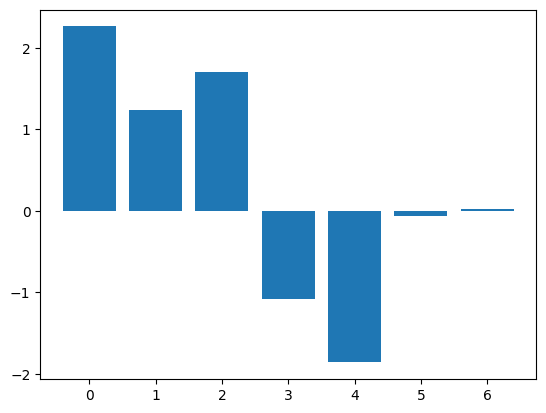

In [177]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(col_X_train, col_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [178]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(col_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(col_X_train, col_y_train)

RandomForestClassifier(random_state=14)

In [179]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

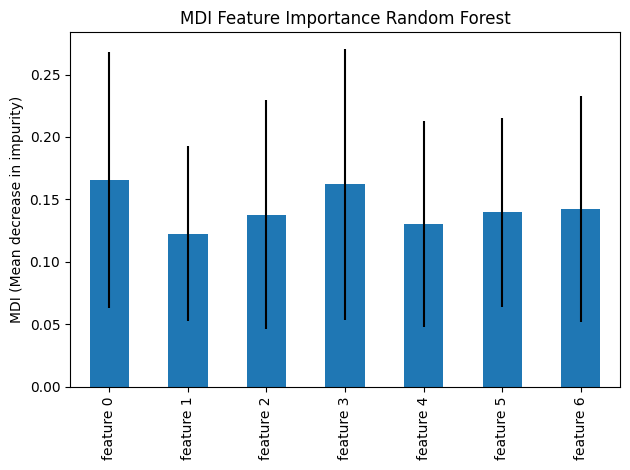

In [180]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [181]:
#correlation matrix

#corr_matrix = a.corr()
#print(corr_matrix)

In [182]:
#removing count of saccades as our weakest feature

col_X_train

array([[1.01010101e-02, 5.65618305e-01, 2.59368315e-02, 6.28404143e-03,
        3.99410111e-04, 5.00000000e-03, 1.57303371e-02],
       [1.01010101e-02, 6.64589467e-01, 3.38735852e-02, 6.32616910e-03,
        3.51410606e-04, 1.93750000e-01, 3.59550562e-01],
       [1.01010101e-02, 7.00874699e-01, 2.50191760e-02, 6.63540188e-03,
        3.67107343e-04, 2.37500000e-02, 4.49438202e-02],
       [0.00000000e+00, 7.40922373e-01, 0.00000000e+00, 0.00000000e+00,
        8.30194651e-04, 2.75000000e-02, 5.61797753e-02],
       [0.00000000e+00, 6.78920249e-01, 2.07114774e-02, 3.54772187e-03,
        3.51315497e-05, 1.25000000e-02, 1.57303371e-02],
       [1.71717172e-01, 6.73573746e-01, 7.15126661e-02, 5.61620937e-02,
        1.46028572e-03, 1.81250000e-01, 2.80898876e-01],
       [0.00000000e+00, 6.73630195e-01, 2.22725599e-02, 3.81512368e-03,
        7.79786163e-05, 6.25000000e-03, 1.57303371e-02],
       [1.91919192e-01, 5.93434285e-01, 4.24109081e-01, 4.16394955e-01,
        3.86472344e-04, 1

In [183]:
col_X_test

array([[4.04040404e-02, 6.49991739e-01, 4.48507548e-02, 8.68650430e-03,
        7.99244826e-04, 1.62500000e-01, 2.76404494e-01],
       [0.00000000e+00, 6.87423521e-01, 3.67876251e-02, 6.30144629e-03,
        2.56103351e-04, 1.50000000e-01, 2.65168539e-01],
       [4.04040404e-02, 8.95667237e-01, 6.25626906e-02, 1.51730749e-02,
        3.65685151e-04, 1.13750000e-01, 2.13483146e-01],
       [5.05050505e-02, 7.04488509e-01, 4.07770934e-01, 1.87165247e-01,
        8.37195779e-04, 1.25000000e-02, 3.37078652e-02],
       [0.00000000e+00, 6.87613049e-01, 7.40423048e-02, 1.26828956e-02,
        2.41821149e-04, 6.12500000e-02, 1.14606742e-01],
       [1.01010101e-02, 9.25247166e-01, 4.84484033e-02, 1.10706723e-02,
        5.08772534e-04, 6.12500000e-02, 1.14606742e-01],
       [5.05050505e-02, 6.07516388e-01, 3.67163256e-02, 1.18446937e-02,
        2.49623304e-05, 1.08750000e-01, 2.04494382e-01],
       [1.31313131e-01, 7.48860652e-01, 1.12379466e-01, 1.08559004e-01,
        7.18674650e-04, 6

In [184]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                      file  count_blinks task mean_1  avg_diameter  \
0     Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_10.xlsx           1.0    1      1     31.667062   
2    Task1_Subject_11.xlsx          13.0    1      1     34.715345   
3    Task1_Subject_13.xlsx           2.0    1      1     28.881044   
4    Task1_Subject_14.xlsx           1.0    1      1     27.099557   
..                     ...           ...  ...    ...           ...   
112  Task1_Subject_43.xlsx           5.0    4      3     31.713234   
113   Task1_Subject_5.xlsx         100.0    4      3     34.510594   
114   Task1_Subject_7.xlsx          10.0    4      2     31.167017   
115   Task1_Subject_8.xlsx          18.0    4      2     38.898044   
116   Task1_Subject_9.xlsx          13.0    4      3     27.132073   

     avg_difference  max_difference  max_diameter  fixation_count  \
0          0.208102        0.236131     65.952232            54.0   
1          0.252434  

In [185]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']



In [186]:
col_data_features = a.drop('mean_1', axis=1)

In [187]:
#removing the 'file' as this is not pertinent to our research question
col_data_features = col_data_features.drop('file', axis = 1)

In [188]:
#removing the 'task' also
col_data_features = col_data_features.drop('task', axis = 1)

In [189]:
# removing maximum pupil diameter and average blink duration as they are the greatest detractors
#removing the 'task' also
col_data_features = col_data_features.drop('max_diameter', axis = 1)

In [190]:
col_data_features = col_data_features.drop('max_difference', axis = 1)

In [191]:
col_data_features = col_data_features.drop('fixation_count', axis = 1)

In [192]:
col_data_features = col_data_features.drop('saccade_count', axis = 1)

In [193]:
col_data_features

,count_blinks,avg_diameter,avg_difference
0,2.0,43.519883,0.208102
1,1.0,31.667062,0.252434
2,13.0,34.715345,0.177241
3,2.0,28.881044,0.204122
4,1.0,27.099557,0.191579
...,...,...,...
112,5.0,31.713234,0.296652
113,100.0,34.510594,0.237287
114,10.0,31.167017,0.169838
115,18.0,38.898044,0.219610


In [194]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(col_data_features)
col_data_features = model.transform(col_data_features)


In [195]:
col_data_features

array([[0.01010101, 0.92524717, 0.0484484 ],
       [0.        , 0.68761305, 0.0740423 ],
       [0.12121212, 0.74872728, 0.0306314 ],
       [0.01010101, 0.6317569 , 0.04615094],
       [0.        , 0.59604033, 0.03890929],
       [0.29292929, 0.56082172, 0.05373361],
       [0.01010101, 0.7008747 , 0.02501918],
       [0.        , 0.63928979, 0.05574173],
       [0.        , 0.6736302 , 0.02227256],
       [0.01010101, 0.66373241, 0.03513186],
       [0.        , 0.87534661, 0.02535547],
       [0.04040404, 0.89566724, 0.06256269],
       [0.        , 0.        , 0.02880728],
       [0.04040404, 0.69933593, 0.15100575],
       [0.05050505, 0.66846188, 0.09056925],
       [0.        , 0.852369  , 0.01989687],
       [0.04040404, 0.69933593, 0.15100575],
       [0.        , 0.75391808, 0.17810196],
       [0.        , 0.67696833, 0.04846341],
       [0.        , 0.58796   , 0.02306696],
       [0.        , 0.659635  , 0.02070975],
       [0.        , 0.68742352, 0.03678763],
       [0.

In [196]:
#test-train split

col_X_train, col_X_test, col_y_train, col_y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

# Feature Importance second dataset 

In [197]:
#remove missing values - will not be able to convert  these for use in the modelling 

final = final.dropna()

In [198]:
ml_features = final[['CURRENT_SAC_DURATION', 'CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y','CURRENT_SAC_BLINK_DURATION']]

In [199]:
ml_target = final['task']

In [200]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(ml_features)
ml_features = model.transform(ml_features)


In [201]:
ml_features

array([[0.86725664, 0.625     , 0.31897905, 0.11650562],
       [0.46902655, 0.25      , 0.12437295, 0.01738612],
       [0.4159292 , 0.        , 0.18758537, 0.01442516],
       [0.38053097, 0.        , 0.90351307, 0.02239696],
       [0.27433628, 0.5625    , 0.39987114, 0.05918113],
       [0.53982301, 0.75      , 0.08515155, 0.11718255],
       [0.40707965, 0.8125    , 0.23305645, 0.09699024],
       [0.43362832, 0.0625    , 0.16644475, 0.02068872],
       [0.47787611, 0.375     , 0.34371724, 0.02223427],
       [1.        , 0.0625    , 0.26649772, 0.15165401],
       [0.23893805, 0.3125    , 0.19475406, 0.17348156],
       [0.46017699, 0.8125    , 0.38359201, 0.0353308 ],
       [0.50442478, 0.0625    , 0.16796695, 0.03207701],
       [0.61061947, 0.        , 0.30630159, 0.43237527],
       [0.62831858, 0.75      , 0.03447364, 0.03509928],
       [0.62831858, 0.5625    , 0.06156232, 0.03697397],
       [0.45132743, 0.125     , 0.06741294, 0.08920824],
       [0.53097345, 0.6875    ,

In [202]:
#test-train split

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

Feature: 0, Score: -4.12560
Feature: 1, Score: -0.28426
Feature: 2, Score: -0.77364
Feature: 3, Score: -0.18689


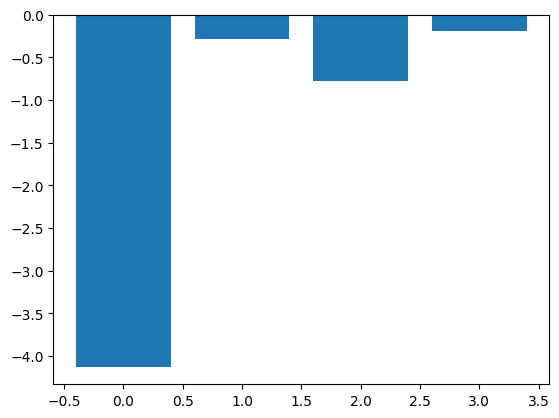

In [203]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(ml_X_train, ml_y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [204]:
#fitting random forest to assist with feature importance - different to the KNN model earlier 

#naming features 0 to as many exist within the model
feature_names = [f"feature {i}" for i in range(ml_X_train.shape[1])]


#including random state in here so that it can be reproduced - arbitrary number is used 
random_forest_classifier = RandomForestClassifier(random_state=14)
random_forest_classifier.fit(ml_X_train, ml_y_train)

RandomForestClassifier(random_state=14)

In [205]:
#creating our MDI values using the random forest classifier 
feat_importances = random_forest_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_], axis=0)

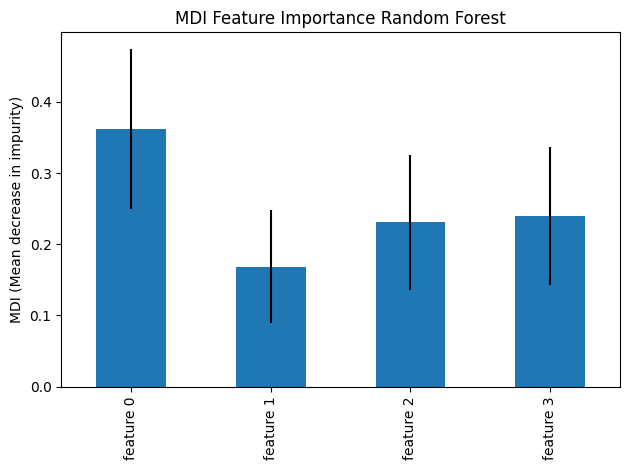

In [206]:
#plotting our MDI for features - this will make it easier to interpret 
forest_importances = pd.Series(feat_importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI Feature Importance Random Forest")
ax.set_ylabel("MDI (Mean decrease in impurity)")
fig.tight_layout()

In [207]:
#correlation matrix

corr_matrix = final.corr()
print(corr_matrix)

                            RECORDING_SESSION_LABEL  CURRENT_SAC_DURATION  \
RECORDING_SESSION_LABEL                    1.000000              0.162224   
CURRENT_SAC_DURATION                       0.162224              1.000000   
task                                      -0.040954             -0.592410   
CURRENT_SAC_BLINK_END                      0.302978              0.202459   
CURRENT_SAC_BLINK_DURATION                 0.154321              0.042874   
RIGHT_PUPIL_SIZE_y                        -0.106916             -0.017715   

                                task  CURRENT_SAC_BLINK_END  \
RECORDING_SESSION_LABEL    -0.040954               0.302978   
CURRENT_SAC_DURATION       -0.592410               0.202459   
task                        1.000000              -0.224387   
CURRENT_SAC_BLINK_END      -0.224387               1.000000   
CURRENT_SAC_BLINK_DURATION -0.040142               0.184479   
RIGHT_PUPIL_SIZE_y         -0.005060              -0.173149   

                  

# Removing the worst performing features from the MLA dataset - did not do this previously but models seriously underperforming, performs even worse with the feature removed, so leaving it in

In [208]:
# removing maximum pupil diameter and average blink duration as they are the greatest detractors
#removing the 'task' also
#ml_features = final[['CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y','CURRENT_SAC_BLINK_DURATION']]

In [209]:
#ml_features

In [210]:
#scaling the feature data
#scaler = MinMaxScaler()
#model = scaler.fit(ml_features)
#ml_features = model.transform(ml_features)


In [211]:
#test-train split

#ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

# Multiclass Classifiers 

# SVM model

## COLET

In [212]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1, scoring='accuracy')
  
# fitting the gridsearch onto the model - using our testing data
gridsearch.fit(col_X_train, col_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [213]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=1, kernel='sigmoid')


In [214]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52) 

# fit to training set
support_vc.fit(col_X_train,col_y_train)

# predictions on test set
y_pred=support_vc.predict(col_X_test)

#accuracy score
acc = accuracy_score(col_y_test,y_pred)

# F1 score

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5556    0.3846    0.4545        13
           2     0.2857    0.5455    0.3750        11
           3     0.6000    0.2727    0.3750        11

    accuracy                         0.4000        35
   macro avg     0.4804    0.4009    0.4015        35
weighted avg     0.4847    0.4000    0.4045        35



In [215]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[5, 8, 0],
       [3, 6, 2],
       [1, 7, 3]], dtype=int64)

## MLA

In [216]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(ml_X_train, ml_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [217]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'poly'}
SVC(C=10, gamma=1, kernel='poly')


In [218]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=1, kernel='poly', random_state = 52) 

# fit to training set
support_vc.fit(ml_X_train,ml_y_train)

# predictions on test set
y_pred=support_vc.predict(ml_X_test)

#accuracy score
acc = accuracy_score(ml_y_test,y_pred)

# F1 score

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     1.0000    0.4286    0.6000         7
           2     0.0000    0.0000    0.0000         9
           3     0.0000    0.0000    0.0000         4
           4     0.1875    0.7500    0.3000         4

    accuracy                         0.2500        24
   macro avg     0.2969    0.2946    0.2250        24
weighted avg     0.3229    0.2500    0.2250        24



In [219]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[3, 1, 0, 3],
       [0, 0, 1, 8],
       [0, 2, 0, 2],
       [0, 1, 0, 3]], dtype=int64)

# CART

In [220]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6,8,10],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10,0.2,0.4],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10,0.2,0.4]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [221]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(col_X_train, col_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 5, 'max_features': 0.2, 'min_samples_leaf': 0.1}


In [222]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 5, max_features = 0.2, min_samples_leaf = 0.1, random_state = 50)
final_model.fit(col_X_train, col_y_train)

print(final_model)

#test them 
expected_y  = col_y_test
predicted_y = final_model.predict(col_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(col_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(col_X_test, col_y_test)))

# F1 score
print(classification_report(col_y_test, y_pred, digits=4))

DecisionTreeClassifier(max_depth=5, max_features=0.2, min_samples_leaf=0.1,
                       random_state=50)
Accuracy of CART classifier on test set: 0.4571
              precision    recall  f1-score   support

           1     0.5714    0.6154    0.5926        13
           2     0.3000    0.2727    0.2857        11
           3     0.4545    0.4545    0.4545        11

    accuracy                         0.4571        35
   macro avg     0.4420    0.4476    0.4443        35
weighted avg     0.4494    0.4571    0.4528        35



In [223]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[8, 3, 2],
       [4, 3, 4],
       [2, 4, 5]], dtype=int64)

# MLA

In [224]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [225]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(ml_X_train, ml_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.08}


In [226]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 6, max_features = 0.8, min_samples_leaf = 0.08, random_state = 52)
final_model.fit(ml_X_train, ml_y_train)

print(final_model)
#test them 
#expected_y  = ml_y_test
#predicted_y = final_model.predict(ml_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(ml_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(ml_X_test, ml_y_test)))

print(classification_report(ml_y_test, y_pred, digits=4))

DecisionTreeClassifier(max_depth=6, max_features=0.8, min_samples_leaf=0.08,
                       random_state=52)
Accuracy of CART classifier on test set: 0.3333
              precision    recall  f1-score   support

           1     0.6667    0.5714    0.6154         7
           2     0.3333    0.2222    0.2667         9
           3     0.0000    0.0000    0.0000         4
           4     0.3333    0.5000    0.4000         4

    accuracy                         0.3333        24
   macro avg     0.3333    0.3234    0.3205        24
weighted avg     0.3750    0.3333    0.3462        24



In [227]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 2, 1, 0],
       [1, 2, 4, 2],
       [1, 1, 0, 2],
       [0, 1, 1, 2]], dtype=int64)

# GNB

# Colet

In [228]:


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=10, 
                                    random_state=999)


In [229]:
model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(col_X_test)

gs_NB.fit(col_X_test, col_y_test)
#testing above - below is previous
#gs_NB.fit(Data_transformed, col_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02,...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [230]:
gs_NB.best_params_

{'var_smoothing': 0.533669923120631}

In [231]:
nb = GaussianNB(var_smoothing = 0.533669923120631)
nb.fit(col_X_test, col_y_test)
# make predictions on test set
y_pred=nb.predict(col_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(col_y_test,y_pred)

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.4815    1.0000    0.6500        13
           2     0.6667    0.1818    0.2857        11
           3     0.8000    0.3636    0.5000        11

    accuracy                         0.5429        35
   macro avg     0.6494    0.5152    0.4786        35
weighted avg     0.6398    0.5429    0.4884        35



In [232]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[13,  0,  0],
       [ 8,  2,  1],
       [ 6,  1,  4]], dtype=int64)

# MLA

In [233]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(ml_X_test)

gs_NB.fit(Data_transformed, ml_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [234]:
gs_NB.best_params_

{'var_smoothing': 0.533669923120631}

In [235]:
nb = GaussianNB(var_smoothing = 0.533669923120631)
nb.fit(ml_X_train, ml_y_train)
# make predictions on test set
y_pred=nb.predict(ml_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(ml_y_test,y_pred)

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     1.0000    0.2857    0.4444         7
           2     0.2000    0.1111    0.1429         9
           3     0.0000    0.0000    0.0000         4
           4     0.1538    0.5000    0.2353         4

    accuracy                         0.2083        24
   macro avg     0.3385    0.2242    0.2056        24
weighted avg     0.3923    0.2083    0.2224        24



In [236]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[2, 1, 1, 3],
       [0, 1, 2, 6],
       [0, 2, 0, 2],
       [0, 1, 1, 2]], dtype=int64)

# Gradient Boosted Regression Tree

## COLET

In [237]:
import lightgbm as lgb
colet_gbm = lgb.LGBMClassifier(verbose=0)

# have changed to markdown due to output taking up too much space
#lightGBM



cgbm_param_grid = {'learning_rate': [0.2, 0.1, 0.05, 0.01, 0.001, 0.001],
                   'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500],
                   'max_depth': [1, 3, 5, 7, 10]
                  }

gs_cgbm = GridSearchCV(estimator=colet_gbm, param_grid=cgbm_param_grid, cv=cv_method)
gs_cgbm.fit(col_X_train, col_y_train)


cgbm_best_params = gs_cgbm.best_params_


#running model with best parameters 
cgbm_best_params

In [238]:
colet_gbm = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = 1, n_estimators = 50, verbose=0)
colet_gbm.fit(col_X_train, col_y_train, eval_set=[(col_X_train, col_y_train),(col_X_test, col_y_test)])


LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=50, verbose=0)

In [239]:
y_pred = colet_gbm.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5714    0.3077    0.4000        13
           2     0.2857    0.5455    0.3750        11
           3     0.4286    0.2727    0.3333        11

    accuracy                         0.3714        35
   macro avg     0.4286    0.3753    0.3694        35
weighted avg     0.4367    0.3714    0.3712        35



In [240]:
confusion_matrix(col_y_test, y_pred)

array([[4, 7, 2],
       [3, 6, 2],
       [0, 8, 3]], dtype=int64)

## MLA

# code here 

mla_gbm = lgb.LGBMClassifier(verbose=0)

mla_param_grid = {'learning_rate': [0.2, 0.1, 0.05, 0.01, 0.001, 0.001],
                   'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500],
                   'max_depth': [1, 3, 5, 7, 10]
                                 }

gs_mlgbm = GridSearchCV(estimator = mla_gbm, param_grid=mla_param_grid, cv =cv_method)
gs_mlgbm.fit(ml_X_train, ml_y_train)


mlgbm_best_params = gs_mlgbm.best_params_

#running model with best parameters 
mlgbm_best_params

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}

In [241]:
mla_gbm = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = 1, n_estimators = 50, verbose=0)
mla_gbm.fit(ml_X_train, ml_y_train, eval_set=[(col_X_train, col_y_train),(col_X_test, col_y_test)])

LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=50, verbose=0)

In [242]:
y_pred = mla_gbm.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5833    1.0000    0.7368         7
           2     1.0000    0.1111    0.2000         9
           3     0.0000    0.0000    0.0000         4
           4     0.2727    0.7500    0.4000         4

    accuracy                         0.4583        24
   macro avg     0.4640    0.4653    0.3342        24
weighted avg     0.5906    0.4583    0.3566        24



In [243]:
confusion_matrix(ml_y_test, y_pred)

array([[7, 0, 0, 0],
       [2, 1, 0, 6],
       [2, 0, 0, 2],
       [1, 0, 0, 3]], dtype=int64)

In [244]:
#drop any instances of a missing target
deep_data_multiclass.dropna(subset=['mean_1_merged'], inplace=True)

In [245]:
deep_data_multiclass


,mental_1_merged,physical_1_merged,temporal_1_merged,perforamnce_1_merged,effort_1_merged,frustation_1_merged,mean_1_merged,file,task,gaze_timestamp,...,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence_right,filter_response,base_Data
0,10,5,15,25,25,10,1,Task1_Subject_1.xlsx,1,5440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,5,15,25,25,10,1,Task1_Subject_1.xlsx,1,5428.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,5,15,25,25,10,1,Task1_Subject_1.xlsx,1,5440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,5,15,25,25,10,1,Task1_Subject_1.xlsx,1,5436.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,5,15,25,25,10,1,Task1_Subject_1.xlsx,1,5432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488731,90,80,90,70,80,35,3,Task1_Subject_9.xlsx,4,inf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488732,90,80,90,70,80,35,3,Task1_Subject_9.xlsx,4,inf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488733,90,80,90,70,80,35,3,Task1_Subject_9.xlsx,4,inf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488734,90,80,90,70,80,35,3,Task1_Subject_9.xlsx,4,inf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# TabNet

In [246]:
deep_data_multiclass2 = deep_data_multiclass.drop(columns=['file', 'task', 'ID', 'mental_1_merged',	'physical_1_merged',	'temporal_1_merged',	'perforamnce_1_merged',	'effort_1_merged'	,'frustation_1_merged', 'base_data', 'start_timestamp', 'end_timestamp', 'start_frame_index', 'end_frame_index', 'index', 'filter_response', 'projected_sphere_center_x',	'projected_sphere_center_y',	'projected_sphere_axis_a',	'projected_sphere_axis_b',	'projected_sphere_angle',	'duration',	'confidence_right',	'base_Data', 'sphere_radius',	'circle_3d_center_x',	'circle_3d_center_y',	'circle_3d_center_z',	'circle_3d_normal_x',	'circle_3d_normal_y',	'circle_3d_normal_z',	'circle_3d_radius',	'theta',	'phi'])
#deep_data_multiclass2 =deep_data_multiclass2.dropna(subset=['gaze_timestamp'], inplace=True)

#savign a copy for when we do the binary classifiers
deep_data_multiclass3 = deep_data_multiclass.drop(columns=['file', 'task', 'ID', 'mental_1_merged',	'physical_1_merged',	'temporal_1_merged',	'perforamnce_1_merged',	'effort_1_merged'	,'frustation_1_merged', 'base_data', 'start_timestamp', 'end_timestamp', 'start_frame_index', 'end_frame_index', 'index', 'filter_response', 'projected_sphere_center_x',	'projected_sphere_center_y',	'projected_sphere_axis_a',	'projected_sphere_axis_b',	'projected_sphere_angle',	'duration',	'confidence_right',	'base_Data', 'sphere_radius',	'circle_3d_center_x',	'circle_3d_center_y',	'circle_3d_center_z',	'circle_3d_normal_x',	'circle_3d_normal_y',	'circle_3d_normal_z',	'circle_3d_radius',	'theta',	'phi'])


In [247]:
#identify target variable
dd_multi_x = deep_data_multiclass2[['norm_pos_x', 'norm_pos_y', 'gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z', 'eye_center0_3d_x', 'eye_center0_3d_y', 'eye_center0_3d_z', 'gaze_normal0_x', 'gaze_normal0_y', 'gaze_normal0_z']]
dd_multi_y = deep_data_multiclass2['mean_1_merged']

In [248]:
#make sure timestamp is gone 
dd_multi_x

,norm_pos_x,norm_pos_y,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,eye_center0_3d_y,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z
0,0.455078,0.751953,-5.898438,-25.578125,89.317307,19.375000,15.789062,-19.906250,-0.211426,-0.349121,0.913086
1,0.535156,0.672852,5.625000,-17.515625,84.019585,19.375000,15.789062,-19.906250,-0.124878,-0.307861,0.943359
2,0.456055,0.751953,-5.843750,-25.968750,90.637642,19.375000,15.789062,-19.906250,-0.208618,-0.348633,0.913574
3,0.539551,0.69873,6.316406,-19.796875,84.763390,19.375000,15.789062,-19.906250,-0.117126,-0.325195,0.938477
4,0.424805,0.65332,-10.000000,-16.562500,87.019844,19.375000,15.789062,-19.906250,-0.254150,-0.284912,0.924316
...,...,...,...,...,...,...,...,...,...,...,...
488731,0.484131,0.627441,-3.123047,-30.453125,184.953110,21.031250,14.734375,-15.359375,-0.116882,-0.199585,0.972656
488732,0.458984,0.58252,-10.992188,-23.500000,190.766144,20.984375,14.695312,-15.437500,-0.150757,-0.169189,0.974121
488733,0.476318,0.669434,-7.542969,-51.343750,250.564987,20.781250,14.687500,-15.570312,-0.102783,-0.220459,0.970215
488734,0.400391,0.339844,-19.156250,12.398438,124.270531,19.687500,14.890625,-20.578125,-0.258789,-0.033966,0.965332


In [249]:
# Iterate over each column
for column in dd_multi_x.columns:
    dd_multi_x[column].fillna(dd_multi_x[column].median(), inplace=True)

In [250]:
#replace missing values with median of the column
#there is not a single row without a missing value, the data is very sparse - need to fill the data for this reason 

import pandas as pd

# Iterate over each column
for column in dd_multi_x.columns:
    dd_multi_x[column].fillna(dd_multi_x[column].median(), inplace=True)

In [251]:
for column in dd_multi_x.columns:
    # Check if the column contains numeric data
    if np.issubdtype(dd_multi_x[column].dtype, np.number):
        # Replace inf and -inf values with NaN
        dd_multi_x[column].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Fill missing values (including previous inf and -inf values) with the median
        dd_multi_x[column].fillna(dd_multi_x[column].median(), inplace=True)

In [252]:
#using full dataset for tabnet to allow the deep learning model to identify features

#splitting out the  dataset
#identify the features and target
#deep_data_multiclass
#drop the fields we don't need - file, task, ID
#deep_data_multiclass = deep_data_multiclass.drop(columns=['file', 'task', 'ID', 'mental_1_merged',	'physical_1_merged',	'temporal_1_merged',	'perforamnce_1_merged',	'effort_1_merged'	,'frustation_1_merged', 'base_data', 'start_timestamp', 'end_timestamp', 'start_frame_index', 'end_frame_index', 'index', 'filter_response', 'projected_sphere_center_x',	'projected_sphere_center_y',	'projected_sphere_axis_a',	'projected_sphere_axis_b',	'projected_sphere_angle',	'duration',	'confidence_right',	'base_Data', 'sphere_radius',	'circle_3d_center_x',	'circle_3d_center_y',	'circle_3d_center_z',	'circle_3d_normal_x',	'circle_3d_normal_y',	'circle_3d_normal_z',	'circle_3d_radius',	'theta',	'phi'])

#identify target variable
#dd_multi_x = deep_data_multiclass[['gaze_timestamp',	'norm_pos_x', 'norm_pos_y', 'gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z', 'eye_center0_3d_x', 'eye_center0_3d_y', 'eye_center0_3d_z', 'gaze_normal0_x', 'gaze_normal0_y', 'gaze_normal0_z']]
#dd_multi_y = deep_data_multiclass['mean_1_merged']
#dd_multi_y = dd_multi_y['mean_1_merged'].astype(float)


#apply split
cdd_X_train, cdd_X_test, cdd_y_train, cdd_y_test = train_test_split(dd_multi_x , dd_multi_y, test_size=0.3, random_state=61)

#apply normalization 

#split colet deep leaerning data into test./train 



In [253]:
#dd_multi_x = deep_data_multiclass[['gaze_timestamp',	'norm_pos_x', 'norm_pos_y', 'base_data', 'gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z', 'eye_center0_3d_x', 'eye_center0_3d_y', 'eye_center0_3d_z', 'gaze_normal0_x', 'gaze_normal0_y', 'gaze_normal0_z']]

In [254]:
# Iterate over each column
#for column in cdd_X_test.columns:
#    cdd_X_train[column].fillna(cdd_X_train[column].median(), inplace=True)

In [255]:
#for column in cdd_X_test.columns:
    # Check if the column contains numeric data
#    if np.issubdtype(cdd_X_train[column].dtype, np.number):
#        # Replace inf and -inf values with NaN
#        cdd_X_train[column].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Fill missing values (including previous inf and -inf values) with the median
#        cdd_X_train[column].fillna(cdd_X_train[column].median(), inplace=True)

In [256]:
#check datatypes - all need to be float, not string
print('X_Train datatypes:', cdd_X_train.dtypes)
print('X_test datatypes:', cdd_X_test.dtypes)
print('y_test datatypes:', cdd_y_train.dtypes)
print('y_train datatypes:', cdd_y_train.dtypes)

X_Train datatypes: norm_pos_x          float16
norm_pos_y           object
gaze_point_3d_x     float16
gaze_point_3d_y     float16
gaze_point_3d_z     float32
eye_center0_3d_x    float16
eye_center0_3d_y    float16
eye_center0_3d_z    float16
gaze_normal0_x      float16
gaze_normal0_y      float16
gaze_normal0_z      float16
dtype: object
X_test datatypes: norm_pos_x          float16
norm_pos_y           object
gaze_point_3d_x     float16
gaze_point_3d_y     float16
gaze_point_3d_z     float32
eye_center0_3d_x    float16
eye_center0_3d_y    float16
eye_center0_3d_z    float16
gaze_normal0_x      float16
gaze_normal0_y      float16
gaze_normal0_z      float16
dtype: object
y_test datatypes: category
y_train datatypes: category


In [257]:
#changing to float
#cdd_X_train = cdd_X_train.astype(float)
#cdd_X_test = cdd_X_test.astype(float)
#cdd_y_train = cdd_y_train.astype(float)
#cdd_y_test = cdd_y_test.astype(float)

In [258]:
#changing to numpy for the TabNet model - it won't take pandas dataframes

cdd_X_train = cdd_X_train.to_numpy()
cdd_X_test = cdd_X_test.to_numpy()
cdd_y_train = cdd_y_train.to_numpy()
cdd_y_test = cdd_y_test.to_numpy()

In [259]:
cdd_X_trainnp = np.array(cdd_X_train)
cdd_X_testnp = np.array(cdd_X_test)
cdd_y_trainnp = np.array(cdd_y_train)
cdd_y_testnp = np.array(cdd_y_test)

In [260]:
cdd_X_trainnp = cdd_X_trainnp.astype('float32')
cdd_X_testnp = cdd_X_testnp.astype('float32')
cdd_y_trainnp = cdd_y_trainnp.astype('float32')
cdd_y_testnp = cdd_y_testnp.astype('float32')



## COLET

In [261]:
#SGD classifier as we don't have a large dataset, ADAM if we had a larger one 

#example of this being used below 
#https://www.kaggle.com/code/enigmak/tabnet-deep-neural-network-for-tabular-data#Tabnet 
#tnet_classifier = TabNetClassifier(optimizer_fn=torch.optim.SGD,
#                                   scheduler_params={"step_size":10,
#                                                    "gamma":0.9},
#                                   scheduler_fn=torch.optim.lr_scheduler.StepLR,
#                                  )

#fitting the model
#tnet_classifier.fit(
#    col_X_train, col_y_train,
#    eval_set=[(cdd_X_train, cdd_y_train),(cdd_X_test, cdd_y_test)],
#    eval_name=['train','test'],
#    eval_metric=['accuracy'],
#    max_epochs=50, 
#    patience=10,
#    batch_size=10,
#    virtual_batch_size=10,
#    num_workers=0,
#    weights=1,
#    drop_last=False
#)

#Tuning hyperparameters 

classifier = TabNetClassifier(seed=42)
# Define the hyperparameter search space
param_grid = {
    'n_steps': [3, 4, 5],  # Number of decision steps
    'gamma': [1.0, 1.5, 2.0],  # Relaxation factor for feature selection
    'lambda_sparse': [0.001, 0.01, 0.1]  # Regularization parameter
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(cdd_X_trainnp, cdd_y_trainnp)

# Retrieve the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(cdd_X_testnp, cdd_y_testnp)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

In [262]:
classifier = TabNetClassifier(seed=42)
classifier.fit(X_train=cdd_X_trainnp, y_train=cdd_y_trainnp,
               patience=5,max_epochs=50,
               eval_metric=['auc'])

epoch 0  | loss: 1.05263 |  0:00:18s
epoch 1  | loss: 1.00808 |  0:00:36s
epoch 2  | loss: 0.98906 |  0:00:54s
epoch 3  | loss: 0.95648 |  0:01:12s
epoch 4  | loss: 0.93615 |  0:01:30s
epoch 5  | loss: 0.91609 |  0:01:48s
epoch 6  | loss: 0.90917 |  0:02:05s
epoch 7  | loss: 0.9013  |  0:02:23s
epoch 8  | loss: 0.88846 |  0:02:41s
epoch 9  | loss: 0.88174 |  0:02:58s
epoch 10 | loss: 0.87634 |  0:03:16s
epoch 11 | loss: 0.8708  |  0:03:34s
epoch 12 | loss: 0.86232 |  0:03:51s
epoch 13 | loss: 0.85022 |  0:04:09s
epoch 14 | loss: 0.8364  |  0:04:27s
epoch 15 | loss: 0.81861 |  0:04:45s
epoch 16 | loss: 0.79835 |  0:05:03s
epoch 17 | loss: 0.79059 |  0:05:20s
epoch 18 | loss: 0.77813 |  0:05:38s
epoch 19 | loss: 0.7653  |  0:05:56s
epoch 20 | loss: 0.74725 |  0:06:13s
epoch 21 | loss: 0.72459 |  0:06:31s
epoch 22 | loss: 0.70229 |  0:06:49s
epoch 23 | loss: 0.66748 |  0:07:07s
epoch 24 | loss: 0.64216 |  0:07:24s
epoch 25 | loss: 0.6312  |  0:07:42s
epoch 26 | loss: 0.60723 |  0:08:00s
e

In [263]:
y_pred=classifier.predict(cdd_X_testnp)
print(classification_report(cdd_y_testnp, y_pred))

              precision    recall  f1-score   support

         1.0       0.41      0.43      0.42     41959
         2.0       0.42      0.51      0.46     50137
         3.0       0.50      0.38      0.44     54525

    accuracy                           0.44    146621
   macro avg       0.45      0.44      0.44    146621
weighted avg       0.45      0.44      0.44    146621



In [264]:
confusion_matrix(cdd_y_testnp, y_pred)

array([[18250, 15248,  8461],
       [12353, 25719, 12065],
       [13989, 19661, 20875]], dtype=int64)

## MLA

In [265]:
deep_data_mla2 = deep_data_mla


In [266]:
deep_data_mla2

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task,RIGHT_PUPIL_SIZE,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_DURATION
0,10,423.0,1,414.0,NaN,NaN
1,10,423.0,1,414.0,NaN,NaN
2,10,423.0,1,414.0,NaN,NaN
3,10,423.0,1,414.0,NaN,NaN
4,10,423.0,1,414.0,NaN,NaN
...,...,...,...,...,...,...
114671,6,NaN,4,NaN,NaN,40.0
114672,6,NaN,4,NaN,NaN,30.0
114673,6,NaN,4,NaN,NaN,42.0
114674,6,NaN,4,NaN,NaN,32.0


In [267]:
#change the sac blnk duration to float

deep_data_mla2['CURRENT_SAC_BLINK_DURATION'] = deep_data_mla2['CURRENT_SAC_BLINK_DURATION'].astype(float)
#testing
deep_data_mla2['RECORDING_SESSION_LABEL'] = deep_data_mla2['RECORDING_SESSION_LABEL'].astype(float)
deep_data_mla2['CURRENT_FIX_PUPIL'] = deep_data_mla2['CURRENT_FIX_PUPIL'].astype(float)
deep_data_mla2['RIGHT_PUPIL_SIZE'] = deep_data_mla2['RIGHT_PUPIL_SIZE'].astype(float)
deep_data_mla2['CURRENT_SAC_BLINK_DURATION'] = deep_data_mla2['CURRENT_SAC_BLINK_DURATION'].astype(float)
deep_data_mla2['CURRENT_SAC_DURATION'] = deep_data_mla2['CURRENT_SAC_DURATION'].astype(float)

#change the task to float
deep_data_mla2['task'] = deep_data_mla2['task'].astype(float)

In [268]:
#replacing the missing values with the median of the column grouped by task and recording session label
deep_data_mla2['CURRENT_SAC_BLINK_DURATION'] = deep_data_mla2.groupby(['task', 'RECORDING_SESSION_LABEL'])['CURRENT_SAC_BLINK_DURATION'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
deep_data_mla2['CURRENT_SAC_DURATION'] = deep_data_mla2.groupby(['task', 'RECORDING_SESSION_LABEL'])['CURRENT_SAC_DURATION'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
deep_data_mla2['CURRENT_FIX_PUPIL'] = deep_data_mla2.groupby(['task', 'RECORDING_SESSION_LABEL'])['CURRENT_FIX_PUPIL'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)
deep_data_mla2['RIGHT_PUPIL_SIZE'] = deep_data_mla2.groupby(['task', 'RECORDING_SESSION_LABEL'])['RIGHT_PUPIL_SIZE'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

In [269]:
#sometimes this doesn't take - just rerun from the deep_data_mla2 = deep_data_mla again and it should work, altennatively try run it without the =
#i.e. run it as just  deep_data_mla2.dropna()
deep_data_mla2 = deep_data_mla2.dropna()

In [270]:
deep_data_mla2['task'].unique()

array([1., 2., 3., 4.])

In [271]:
#saving a copy of this for the binary classifiers 
deep_data_mla3 = deep_data_mla2

In [272]:
#identify target variable
dm_multi_x = deep_data_mla2[['RIGHT_PUPIL_SIZE',	'CURRENT_SAC_BLINK_DURATION',	'CURRENT_SAC_DURATION', 'CURRENT_FIX_PUPIL']]
dm_multi_y = deep_data_mla2['task']

In [273]:
#apply split
dm_X_train, dm_X_test, dm_y_train, dm_y_test = train_test_split(dm_multi_x , dm_multi_y, test_size=0.3, random_state=61)

In [274]:
#changing to numpy 
dm_X_train = dm_X_train.to_numpy()
dm_X_test = dm_X_test.to_numpy()
dm_y_train = dm_y_train.to_numpy()
dm_y_test = dm_y_test.to_numpy()

In [275]:
#changing to array
dm_X_train = np.array(dm_X_train)
dm_X_test = np.array(dm_X_test)
dm_y_train = np.array(dm_y_train)
dm_y_test = np.array(dm_y_test)

In [276]:
#changing to float
dm_X_train = dm_X_train.astype('float32')
dm_X_test = dm_X_test.astype('float32')
dm_y_train = dm_y_train.astype('float32')
dm_y_test = dm_y_test.astype('float32')

In [277]:
dm_X_train

array([[451.,  26.,  32., 490.],
       [427., 612.,  34., 453.],
       [413.,  84.,  47., 577.],
       ...,
       [568.,  50.,  50., 524.],
       [435., 277.,  46., 455.],
       [434., 186.,  54., 476.]], dtype=float32)

In [278]:
dm_y_train

array([2., 4., 1., ..., 2., 1., 3.], dtype=float32)

In [279]:
classifier = TabNetClassifier(seed=42)
classifier.fit(X_train=dm_X_train, y_train=dm_y_train,
               patience=5,max_epochs=50,
               eval_metric=['auc'])

epoch 0  | loss: 0.09069 |  0:36:10s
epoch 1  | loss: 0.04188 |  1:12:37s
epoch 2  | loss: 0.03567 |  1:48:38s
epoch 3  | loss: 0.03251 |  2:24:39s
epoch 4  | loss: 0.03121 |  3:00:39s
epoch 5  | loss: 0.02971 |  3:36:39s
epoch 6  | loss: 0.03055 |  4:12:39s
epoch 7  | loss: 0.02974 |  4:48:39s
epoch 8  | loss: 0.02906 |  5:24:38s
epoch 9  | loss: 0.02802 |  6:00:35s
epoch 10 | loss: 0.02766 |  6:36:37s
epoch 11 | loss: 0.02743 |  7:12:37s
epoch 12 | loss: 0.02739 |  7:48:47s
epoch 13 | loss: 0.02608 |  8:24:47s
epoch 14 | loss: 0.02535 |  9:00:49s
epoch 15 | loss: 0.026   |  9:36:51s
epoch 16 | loss: 0.02529 |  10:12:51s
epoch 17 | loss: 0.02521 |  10:48:53s
epoch 18 | loss: 0.02564 |  11:25:01s
epoch 19 | loss: 0.0255  |  12:01:02s
epoch 20 | loss: 0.0248  |  12:37:03s
epoch 21 | loss: 0.02487 |  13:13:05s
epoch 22 | loss: 0.0266  |  13:49:09s
epoch 23 | loss: 0.02503 |  14:25:46s
epoch 24 | loss: 0.02364 |  15:03:02s
epoch 25 | loss: 0.02426 |  15:39:25s
epoch 26 | loss: 0.02446 |  

In [280]:
y_pred=classifier.predict(dm_X_test)
print(classification_report(dm_y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.61      0.61      0.61   7839459
         2.0       0.39      0.38      0.39   4500474
         3.0       0.59      0.57      0.58   3308435
         4.0       0.43      0.47      0.45   2886389

    accuracy                           0.53  18534757
   macro avg       0.51      0.51      0.51  18534757
weighted avg       0.53      0.53      0.53  18534757



In [281]:
confusion_matrix(dm_y_test, y_pred)

array([[4804418, 1710924,  560357,  763760],
       [1950570, 1715769,  138167,  695968],
       [ 603600,  534022, 1872971,  297842],
       [ 542857,  410824,  581398, 1351310]], dtype=int64)

# Stacked Model

## Colet 

In [282]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 5, max_features = 0.2, min_samples_leaf = 0.1, random_state = 50)),
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5556    0.3846    0.4545        13
           2     0.3636    0.3636    0.3636        11
           3     0.3333    0.4545    0.3846        11

    accuracy                         0.4000        35
   macro avg     0.4175    0.4009    0.4009        35
weighted avg     0.4254    0.4000    0.4040        35



In [283]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[5, 2, 6],
       [3, 4, 4],
       [1, 5, 5]], dtype=int64)

# Removing GNB

In [284]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 5, max_features = 0.2, min_samples_leaf = 0.1, random_state = 50))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5714    0.6154    0.5926        13
           2     0.3333    0.6364    0.4375        11
           3     0.0000    0.0000    0.0000        11

    accuracy                         0.4286        35
   macro avg     0.3016    0.4172    0.3434        35
weighted avg     0.3170    0.4286    0.3576        35



In [285]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[8, 5, 0],
       [4, 7, 0],
       [2, 9, 0]], dtype=int64)

# Removing CART

In [286]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5385    0.5385    0.5385        13
           2     0.3333    0.3636    0.3478        11
           3     0.4000    0.3636    0.3810        11

    accuracy                         0.4286        35
   macro avg     0.4239    0.4219    0.4224        35
weighted avg     0.4305    0.4286    0.4290        35



In [287]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[7, 4, 2],
       [3, 4, 4],
       [3, 4, 4]], dtype=int64)

# MLA

In [288]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 6, max_features = 0.8, min_samples_leaf = 0.08, random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator=SVC(C=10, gamma=1, kernel='poly', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.8571    0.6316         7
           2     1.0000    0.3333    0.5000         9
           3     0.5000    0.2500    0.3333         4
           4     0.4286    0.7500    0.5455         4

    accuracy                         0.5417        24
   macro avg     0.6071    0.5476    0.5026        24
weighted avg     0.6756    0.5417    0.5182        24



In [289]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[6, 0, 0, 1],
       [2, 3, 1, 3],
       [3, 0, 1, 0],
       [1, 0, 0, 3]], dtype=int64)

# Removing GNB

In [290]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 6, max_features = 0.8, min_samples_leaf = 0.08, random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='poly', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6000    0.8571    0.7059         7
           2     0.0000    0.0000    0.0000         9
           3     0.5000    0.2500    0.3333         4
           4     0.3333    1.0000    0.5000         4

    accuracy                         0.4583        24
   macro avg     0.3583    0.5268    0.3848        24
weighted avg     0.3139    0.4583    0.3448        24



In [291]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[6, 0, 0, 1],
       [2, 0, 1, 6],
       [2, 0, 1, 1],
       [0, 0, 0, 4]], dtype=int64)

# Removing CART

In [292]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='poly', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.4286    0.4615         7
           2     0.0000    0.0000    0.0000         9
           3     0.0000    0.0000    0.0000         4
           4     0.1250    0.2500    0.1667         4

    accuracy                         0.1667        24
   macro avg     0.1562    0.1696    0.1571        24
weighted avg     0.1667    0.1667    0.1624        24



In [293]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[3, 0, 4, 0],
       [0, 0, 4, 5],
       [2, 0, 0, 2],
       [1, 0, 2, 1]], dtype=int64)

# Changing the final classifier

# Colet

# GNB final

In [294]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 5, max_features = 0.2, min_samples_leaf = 0.1, random_state = 50)),
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 0.533669923120631))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5714    0.6154    0.5926        13
           2     0.4000    0.1818    0.2500        11
           3     0.3750    0.5455    0.4444        11

    accuracy                         0.4571        35
   macro avg     0.4488    0.4476    0.4290        35
weighted avg     0.4558    0.4571    0.4384        35



In [295]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[8, 0, 5],
       [4, 2, 5],
       [2, 3, 6]], dtype=int64)

# CART final

In [296]:
estimators = [
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 5, max_features = 0.2, min_samples_leaf = 0.1, random_state = 50))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.4545    0.3846    0.4167        13
           2     0.3077    0.3636    0.3333        11
           3     0.6364    0.6364    0.6364        11

    accuracy                         0.4571        35
   macro avg     0.4662    0.4615    0.4621        35
weighted avg     0.4655    0.4571    0.4595        35



In [297]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2", "3"])

array([[5, 7, 1],
       [4, 4, 3],
       [2, 2, 7]], dtype=int64)

# MLA

# GNB final

In [298]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 6, max_features = 0.8, min_samples_leaf = 0.08, random_state = 52)),
 ('svc', SVC(C=10, gamma=1, kernel='poly', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 0.533669923120631))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5714    0.5714    0.5714         7
           2     0.0000    0.0000    0.0000         9
           3     0.0000    0.0000    0.0000         4
           4     0.1765    0.7500    0.2857         4

    accuracy                         0.2917        24
   macro avg     0.1870    0.3304    0.2143        24
weighted avg     0.1961    0.2917    0.2143        24



In [299]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 0, 0, 3],
       [0, 0, 0, 9],
       [2, 0, 0, 2],
       [1, 0, 0, 3]], dtype=int64)

# CART final

In [300]:
estimators = [
 ('svc', SVC(C=10, gamma=1, kernel='poly', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 0.533669923120631))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 6, max_features = 0.8, min_samples_leaf = 0.08, random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6667    0.5714    0.6154         7
           2     0.1250    0.1111    0.1176         9
           3     0.0000    0.0000    0.0000         4
           4     0.1429    0.2500    0.1818         4

    accuracy                         0.2500        24
   macro avg     0.2336    0.2331    0.2287        24
weighted avg     0.2651    0.2500    0.2539        24



In [301]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2", "3", "4"])

array([[4, 3, 0, 0],
       [2, 1, 1, 5],
       [0, 3, 0, 1],
       [0, 1, 2, 1]], dtype=int64)

# Binary classifiers

## COLET

In [302]:
#converting from multiclass to binary

deep_data_multiclass3['mean_1_merged'] = deep_data_multiclass3['mean_1_merged'].replace('3', '1')

In [303]:
# TabNet binary model Colet

deep_data_multiclass3['mean_1_merged'].unique()

['1', '2']
Categories (2, object): ['1' < '2']

In [304]:
#identify target variable
dd_multi_x = deep_data_multiclass3[['norm_pos_x', 'norm_pos_y', 'gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z', 'eye_center0_3d_x', 'eye_center0_3d_y', 'eye_center0_3d_z', 'gaze_normal0_x', 'gaze_normal0_y', 'gaze_normal0_z']]
dd_multi_y = deep_data_multiclass3['mean_1_merged']

In [305]:
# Iterate over each column
for column in dd_multi_x.columns:
    dd_multi_x[column].fillna(dd_multi_x[column].median(), inplace=True)

In [306]:
#replace missing values with median of the column
#there is not a single row without a missing value, the data is very sparse - need to fill the data for this reason 

import pandas as pd

# Iterate over each column
for column in dd_multi_x.columns:
    dd_multi_x[column].fillna(dd_multi_x[column].median(), inplace=True)

In [307]:
for column in dd_multi_x.columns:
    # Check if the column contains numeric data
    if np.issubdtype(dd_multi_x[column].dtype, np.number):
        # Replace inf and -inf values with NaN
        dd_multi_x[column].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Fill missing values (including previous inf and -inf values) with the median
        dd_multi_x[column].fillna(dd_multi_x[column].median(), inplace=True)

In [308]:
dd_multi_y

0         1
1         1
2         1
3         1
4         1
         ..
488731    1
488732    1
488733    1
488734    1
488735    1
Name: mean_1_merged, Length: 488736, dtype: category
Categories (2, object): ['1' < '2']

In [309]:
#apply split
cdd_X_train, cdd_X_test, cdd_y_train, cdd_y_test = train_test_split(dd_multi_x , dd_multi_y, test_size=0.3, random_state=61)

In [310]:
#check datatypes - all need to be float, not string
print('X_Train datatypes:', cdd_X_train.dtypes)
print('X_test datatypes:', cdd_X_test.dtypes)
print('y_test datatypes:', cdd_y_train.dtypes)
print('y_train datatypes:', cdd_y_train.dtypes)

X_Train datatypes: norm_pos_x          float16
norm_pos_y           object
gaze_point_3d_x     float16
gaze_point_3d_y     float16
gaze_point_3d_z     float32
eye_center0_3d_x    float16
eye_center0_3d_y    float16
eye_center0_3d_z    float16
gaze_normal0_x      float16
gaze_normal0_y      float16
gaze_normal0_z      float16
dtype: object
X_test datatypes: norm_pos_x          float16
norm_pos_y           object
gaze_point_3d_x     float16
gaze_point_3d_y     float16
gaze_point_3d_z     float32
eye_center0_3d_x    float16
eye_center0_3d_y    float16
eye_center0_3d_z    float16
gaze_normal0_x      float16
gaze_normal0_y      float16
gaze_normal0_z      float16
dtype: object
y_test datatypes: category
y_train datatypes: category


In [311]:
#changing to numpy for the TabNet model - it won't take pandas dataframes

cdd_X_train = cdd_X_train.to_numpy()
cdd_X_test = cdd_X_test.to_numpy()
cdd_y_train = cdd_y_train.to_numpy()
cdd_y_test = cdd_y_test.to_numpy()

In [312]:
cdd_X_trainnp = np.array(cdd_X_train)
cdd_X_testnp = np.array(cdd_X_test)
cdd_y_trainnp = np.array(cdd_y_train)
cdd_y_testnp = np.array(cdd_y_test)

In [313]:
cdd_X_trainnp = cdd_X_trainnp.astype('float32')
cdd_X_testnp = cdd_X_testnp.astype('float32')
cdd_y_trainnp = cdd_y_trainnp.astype('float32')
cdd_y_testnp = cdd_y_testnp.astype('float32')



In [314]:
classifier = TabNetClassifier(seed=42)
classifier.fit(X_train=cdd_X_trainnp, y_train=cdd_y_trainnp,
               patience=5,max_epochs=50,
               eval_metric=['auc'])

epoch 0  | loss: 0.63728 |  0:00:18s
epoch 1  | loss: 0.61386 |  0:00:36s
epoch 2  | loss: 0.60676 |  0:00:55s
epoch 3  | loss: 0.59628 |  0:01:13s
epoch 4  | loss: 0.59037 |  0:01:32s
epoch 5  | loss: 0.58718 |  0:01:50s
epoch 6  | loss: 0.58147 |  0:02:08s
epoch 7  | loss: 0.57582 |  0:02:26s
epoch 8  | loss: 0.5734  |  0:02:45s
epoch 9  | loss: 0.56853 |  0:03:03s
epoch 10 | loss: 0.55753 |  0:03:22s
epoch 11 | loss: 0.55384 |  0:03:40s
epoch 12 | loss: 0.54092 |  0:03:59s
epoch 13 | loss: 0.53711 |  0:04:17s
epoch 14 | loss: 0.52759 |  0:04:35s
epoch 15 | loss: 0.5218  |  0:04:54s
epoch 16 | loss: 0.52748 |  0:05:12s
epoch 17 | loss: 0.52501 |  0:05:31s
epoch 18 | loss: 0.5179  |  0:05:49s
epoch 19 | loss: 0.51126 |  0:06:07s
epoch 20 | loss: 0.50855 |  0:06:26s
epoch 21 | loss: 0.50438 |  0:06:44s
epoch 22 | loss: 0.5039  |  0:07:02s
epoch 23 | loss: 0.50039 |  0:07:21s
epoch 24 | loss: 0.49401 |  0:07:39s
epoch 25 | loss: 0.48346 |  0:07:57s
epoch 26 | loss: 0.47497 |  0:08:16s
e

In [315]:
y_pred=classifier.predict(cdd_X_testnp)
print(classification_report(cdd_y_testnp, y_pred))

              precision    recall  f1-score   support

         1.0       0.77      0.54      0.63     96484
         2.0       0.44      0.70      0.54     50137

    accuracy                           0.59    146621
   macro avg       0.61      0.62      0.59    146621
weighted avg       0.66      0.59      0.60    146621



In [316]:
confusion_matrix(cdd_y_testnp, y_pred)

array([[51738, 44746],
       [15244, 34893]], dtype=int64)

## MLA

In [317]:
deep_data_mla3

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task,RIGHT_PUPIL_SIZE,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_DURATION
0,10.0,330.0,1.0,331.0,96.0,46.0
1,10.0,330.0,1.0,331.0,96.0,46.0
2,10.0,330.0,1.0,332.0,96.0,46.0
3,10.0,330.0,1.0,332.0,96.0,46.0
4,10.0,330.0,1.0,332.0,96.0,46.0
...,...,...,...,...,...,...
114671,6.0,509.0,4.0,464.0,96.0,46.0
114672,6.0,509.0,4.0,464.0,96.0,46.0
114673,6.0,509.0,4.0,465.0,96.0,46.0
114674,6.0,509.0,4.0,466.0,96.0,46.0


In [318]:
#converting to binary

deep_data_mla3['task'] = deep_data_mla3['task'].replace(3, 1)
#deep_data_mla3['task']= deep_data_mla3['task'].replace ('4','2')

In [319]:
deep_data_mla3['task']= deep_data_mla3['task'].replace (4,2)

In [320]:
deep_data_mla3['task'].unique()

array([1., 2.])

In [321]:
#identify target variable
dm_multi_x = deep_data_mla3[['RIGHT_PUPIL_SIZE',	'CURRENT_SAC_BLINK_DURATION',	'CURRENT_SAC_DURATION', 'CURRENT_FIX_PUPIL']]
dm_multi_y = deep_data_mla3['task']

In [322]:
#apply split
dm_X_train, dm_X_test, dm_y_train, dm_y_test = train_test_split(dm_multi_x , dm_multi_y, test_size=0.3, random_state=61)

In [323]:
#changing to numpy 
dm_X_train = dm_X_train.to_numpy()
dm_X_test = dm_X_test.to_numpy()
dm_y_train = dm_y_train.to_numpy()
dm_y_test = dm_y_test.to_numpy()

In [324]:
#changing to array
dm_X_train = np.array(dm_X_train)
dm_X_test = np.array(dm_X_test)
dm_y_train = np.array(dm_y_train)
dm_y_test = np.array(dm_y_test)

In [325]:
#changing to float
dm_X_train = dm_X_train.astype('float32')
dm_X_test = dm_X_test.astype('float32')
dm_y_train = dm_y_train.astype('float32')
dm_y_test = dm_y_test.astype('float32')

In [326]:
dm_y_test

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [327]:
classifier = TabNetClassifier(seed=42)
classifier.fit(X_train=dm_X_train, y_train=dm_y_train,
               patience=5,max_epochs=50,
               eval_metric=['auc'])

epoch 0  | loss: 0.05562 |  0:37:21s
epoch 1  | loss: 0.0277  |  1:15:10s
epoch 2  | loss: 0.02443 |  1:52:37s
epoch 3  | loss: 0.02282 |  2:29:48s
epoch 4  | loss: 0.02284 |  3:06:59s
epoch 5  | loss: 0.02264 |  3:44:32s
epoch 6  | loss: 0.02665 |  4:21:44s
epoch 7  | loss: 0.02575 |  4:59:23s
epoch 8  | loss: 0.02558 |  5:38:14s
epoch 9  | loss: 0.0257  |  6:16:58s
epoch 10 | loss: 0.02475 |  6:54:53s
epoch 11 | loss: 0.02614 |  7:32:12s
epoch 12 | loss: 0.02783 |  8:13:37s
epoch 13 | loss: 0.02585 |  8:53:05s
epoch 14 | loss: 0.02449 |  9:31:41s
epoch 15 | loss: 0.02433 |  10:09:57s
epoch 16 | loss: 0.02484 |  10:49:06s
epoch 17 | loss: 0.02693 |  11:27:01s
epoch 18 | loss: 0.02277 |  12:04:43s
epoch 19 | loss: 0.02705 |  12:42:16s
epoch 20 | loss: 0.03089 |  13:18:28s
epoch 21 | loss: 0.03492 |  13:54:42s
epoch 22 | loss: 0.0257  |  14:30:57s
epoch 23 | loss: 0.02383 |  15:07:11s
epoch 24 | loss: 0.05419 |  15:43:26s
epoch 25 | loss: 0.04481 |  16:19:36s
epoch 26 | loss: 0.03442 | 

In [328]:
y_pred=classifier.predict(dm_X_test)
print(classification_report(dm_y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98  11147894
         2.0       0.95      0.99      0.97   7386863

    accuracy                           0.98  18534757
   macro avg       0.97      0.98      0.98  18534757
weighted avg       0.98      0.98      0.98  18534757



In [329]:
confusion_matrix(dm_y_test, y_pred)

array([[10793495,   354399],
       [   51389,  7335474]], dtype=int64)

## Colet

In [413]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                      file  count_blinks task mean_1  avg_diameter  \
0     Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1    Task1_Subject_10.xlsx           1.0    1      1     31.667062   
2    Task1_Subject_11.xlsx          13.0    1      1     34.715345   
3    Task1_Subject_13.xlsx           2.0    1      1     28.881044   
4    Task1_Subject_14.xlsx           1.0    1      1     27.099557   
..                     ...           ...  ...    ...           ...   
112  Task1_Subject_43.xlsx           5.0    4      3     31.713234   
113   Task1_Subject_5.xlsx         100.0    4      3     34.510594   
114   Task1_Subject_7.xlsx          10.0    4      2     31.167017   
115   Task1_Subject_8.xlsx          18.0    4      2     38.898044   
116   Task1_Subject_9.xlsx          13.0    4      3     27.132073   

     avg_difference  max_difference  max_diameter  fixation_count  \
0          0.208102        0.236131     65.952232            54.0   
1          0.252434  

In [414]:
# change the 3 classes into 2 - replacing our high with the 'low' value - combining low and high to consider this our 'abnormal' and 2 will remain our 'normal'

a['mean_1'] = a['mean_1'].replace('3', '1')

In [415]:
a

,file,count_blinks,task,mean_1,avg_diameter,avg_difference,max_difference,max_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,1,43.519883,0.208102,0.236131,65.952232,54.0,53.0
1,Task1_Subject_10.xlsx,1.0,1,1,31.667062,0.252434,0.252434,48.360504,54.0,53.0
2,Task1_Subject_11.xlsx,13.0,1,1,34.715345,0.177241,0.208556,59.019421,66.0,61.0
3,Task1_Subject_13.xlsx,2.0,1,1,28.881044,0.204122,0.228377,57.595341,65.0,65.0
4,Task1_Subject_14.xlsx,1.0,1,1,27.099557,0.191579,0.191579,41.096077,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
112,Task1_Subject_43.xlsx,5.0,4,1,31.713234,0.296652,0.530081,69.479584,157.0,157.0
113,Task1_Subject_5.xlsx,100.0,4,1,34.510594,0.237287,1.776023,138.739395,274.0,204.0
114,Task1_Subject_7.xlsx,10.0,4,2,31.167017,0.169838,0.210912,78.578659,136.0,123.0
115,Task1_Subject_8.xlsx,18.0,4,2,38.898044,0.219610,0.268999,62.268902,101.0,98.0


In [416]:
#target
col_bin_data_target= a['mean_1']



In [417]:
col_bin_data_features = a.drop('mean_1', axis=1)

In [418]:
#removing the 'file' as this is not pertinent to our research question
col_bin_data_features = col_bin_data_features.drop('file', axis = 1)

In [419]:
#removing the 'task' also
col_bin_data_features = col_bin_data_features.drop('task', axis = 1)

In [420]:
#removing the 'saccade' also
col_bin_data_features = col_bin_data_features.drop('saccade_count', axis = 1)

In [421]:
#removing the 'saccade' also
col_bin_data_features = col_bin_data_features.drop('max_diameter', axis = 1)

In [422]:
#removing the 'saccade' also
col_bin_data_features = col_bin_data_features.drop('fixation_count', axis = 1)

In [423]:
#removing the 'saccade' also
col_bin_data_features = col_bin_data_features.drop('max_difference', axis = 1)

In [424]:
col_bin_data_features

,count_blinks,avg_diameter,avg_difference
0,2.0,43.519883,0.208102
1,1.0,31.667062,0.252434
2,13.0,34.715345,0.177241
3,2.0,28.881044,0.204122
4,1.0,27.099557,0.191579
...,...,...,...
112,5.0,31.713234,0.296652
113,100.0,34.510594,0.237287
114,10.0,31.167017,0.169838
115,18.0,38.898044,0.219610


In [425]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(col_bin_data_features)
col_bin_data_features = model.transform(col_bin_data_features)


In [426]:
col_bin_data_features

array([[0.01010101, 0.92524717, 0.0484484 ],
       [0.        , 0.68761305, 0.0740423 ],
       [0.12121212, 0.74872728, 0.0306314 ],
       [0.01010101, 0.6317569 , 0.04615094],
       [0.        , 0.59604033, 0.03890929],
       [0.29292929, 0.56082172, 0.05373361],
       [0.01010101, 0.7008747 , 0.02501918],
       [0.        , 0.63928979, 0.05574173],
       [0.        , 0.6736302 , 0.02227256],
       [0.01010101, 0.66373241, 0.03513186],
       [0.        , 0.87534661, 0.02535547],
       [0.04040404, 0.89566724, 0.06256269],
       [0.        , 0.        , 0.02880728],
       [0.04040404, 0.69933593, 0.15100575],
       [0.05050505, 0.66846188, 0.09056925],
       [0.        , 0.852369  , 0.01989687],
       [0.04040404, 0.69933593, 0.15100575],
       [0.        , 0.75391808, 0.17810196],
       [0.        , 0.67696833, 0.04846341],
       [0.        , 0.58796   , 0.02306696],
       [0.        , 0.659635  , 0.02070975],
       [0.        , 0.68742352, 0.03678763],
       [0.

In [427]:
#test-train split

col_X_train, col_X_test, col_y_train, col_y_test = train_test_split(col_bin_data_features, col_bin_data_target, test_size=0.3, random_state=61)

## MLA

In [428]:
final = pd.merge(mla_final_test, test, left_index=True, right_index=True)

In [429]:
#drop additional columns

final.drop(['RIGHT_PUPIL_SIZE_x', 'LEFT_PUPIL_SIZE'], axis =1, inplace = True)

In [430]:
#remove missing values - will not be able to convert  these for use in the modelling 

final = final.dropna()

In [431]:
#combining task 1 and 3 (both interference tasks) and 2 and 4 (both non-interference tasks)

final['task']= final['task'].replace ('3','1')

In [432]:
final['task']= final['task'].replace ('4','2')

In [433]:
final['task'].unique()

array(['1', '2'], dtype=object)

In [434]:
final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_DURATION,RIGHT_PUPIL_SIZE_y
0,10,128.0,1,11.0,215.272727,510.992782
1,11,83.0,1,5.0,41.200000,316.081529
2,12,77.0,1,1.0,36.000000,379.393072
3,13,73.0,1,1.0,50.000000,1096.443349
4,14,61.0,1,10.0,114.600000,592.011703
...,...,...,...,...,...,...
216,29,59.0,2,5.0,64.000000,295.598046
217,3,50.0,2,2.0,51.000000,266.598510
218,30,70.0,2,10.0,84.200000,357.203114
219,31,48.0,2,8.0,291.750000,475.595538


In [435]:
ml_features = final[['CURRENT_SAC_DURATION', 'CURRENT_SAC_BLINK_END', 'RIGHT_PUPIL_SIZE_y']]

In [436]:
ml_target = final['task']

In [437]:
#scaling the feature data
scaler = MinMaxScaler()
model = scaler.fit(ml_features)
ml_features = model.transform(ml_features)

In [438]:
#test-train split

ml_X_train, ml_X_test, ml_y_train, ml_y_test = train_test_split(ml_features, ml_target, test_size=0.3, random_state=61)

# SVM model Binary

## COLET

In [439]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(col_X_train, col_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [440]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=10, gamma=1, kernel='sigmoid')


In [441]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52) 

# fit to training set
support_vc.fit(col_X_train,col_y_train)

# predictions on test set
y_pred=support_vc.predict(col_X_test)

#accuracy score
acc = accuracy_score(col_y_test,y_pred)

# F1 score

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6562    0.8750    0.7500        24
           2     0.0000    0.0000    0.0000        11

    accuracy                         0.6000        35
   macro avg     0.3281    0.4375    0.3750        35
weighted avg     0.4500    0.6000    0.5143        35



In [442]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[21,  3],
       [11,  0]], dtype=int64)

## MLA

In [443]:
#tuning the hyperparameters through a random grid search

# parameters for the grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]} 

#verbose = 1 to limit the amount of output we see from python   
gridsearch = GridSearchCV(SVC(),  param_grid, refit = True, cv = 10, verbose = 1)
  
# fitting the gridsearch onto the model - using our training data 
gridsearch.fit(ml_X_train, ml_y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [444]:
# optimal hyperparameters 
print(gridsearch.best_params_)
  
# best estimators
print(gridsearch.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [445]:
#creating the SVC model

# using hyperparmaters identified earlier
support_vc=SVC(C=10, gamma=1, kernel='linear', random_state = 52) 

# fit to training set
support_vc.fit(ml_X_train,ml_y_train)

# predictions on test set
y_pred=support_vc.predict(ml_X_test)

#accuracy score
acc = accuracy_score(ml_y_test,y_pred)

# F1 score

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6364    0.6364    0.6364        11
           2     0.6923    0.6923    0.6923        13

    accuracy                         0.6667        24
   macro avg     0.6643    0.6643    0.6643        24
weighted avg     0.6667    0.6667    0.6667        24



In [446]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[7, 4],
       [4, 9]], dtype=int64)

# CART

In [447]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6,8,10],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10,0.2,0.4],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10,0.2,0.4]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [448]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(col_X_train, col_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 2, 'max_features': 0.2, 'min_samples_leaf': 0.4}


In [449]:
#create teh final model with our best hyperparameters 

final_model = DecisionTreeClassifier(max_depth = 2, max_features = 0.2, min_samples_leaf = 0.04, random_state = 50)
final_model.fit(col_X_train, col_y_train)
end = time.time()
print(final_model)
#pringint the total time taken - gives us an idea of computational complexity
#test them 
expected_y  = col_y_test
predicted_y = final_model.predict(col_X_test)
#predicting values from logistic regression and viewing our test score
y_pred = final_model.predict(col_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(col_X_test, col_y_test)))

print(classification_report(col_y_test, predicted_y, digits=4))

DecisionTreeClassifier(max_depth=2, max_features=0.2, min_samples_leaf=0.04,
                       random_state=50)
Accuracy of CART classifier on test set: 0.4286
              precision    recall  f1-score   support

           1     0.6111    0.4583    0.5238        24
           2     0.2353    0.3636    0.2857        11

    accuracy                         0.4286        35
   macro avg     0.4232    0.4110    0.4048        35
weighted avg     0.4930    0.4286    0.4490        35



In [450]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[11, 13],
       [ 7,  4]], dtype=int64)

# MLA

In [451]:
decist = DecisionTreeClassifier(random_state=1)
# Createing our grid of hyperparameters - these are what will be searched by the grid 
params_decist = {
'max_depth': [2, 3,4,5, 6],
'min_samples_leaf': [0.04, 0.06, 0.08, 0.10],
'max_features': [0.2, 0.4,0.6, 0.8, 0.10]
}
# doing our cross fold search through the grid, checkign by accuracy 
#making use of gridsearch to find the optimal values - note verbose = 1 to limit the amount of output we see from python  
grid_decist = GridSearchCV(estimator=decist,
param_grid=params_decist,
scoring=
'accuracy'
,
cv=10,
n_jobs=-1)




In [452]:
# Fitting the grid to our training data to then find our best hyperparameters 
grid_decist.fit(ml_X_train, ml_y_train)

#print best hyperparameters as found earlier - these will be used to run our model 
best_hyperparams = grid_decist.best_params_
print('Best hyerparameters for CART:', best_hyperparams)

Best hyerparameters for CART: {'max_depth': 4, 'max_features': 0.2, 'min_samples_leaf': 0.1}


In [453]:
#final model with hyperparameters found above 

final_model = DecisionTreeClassifier(max_depth = 4, max_features = 0.2, min_samples_leaf = 0.1, random_state = 52)
final_model.fit(ml_X_train, ml_y_train)

print(final_model)

#test them 
expected_y  = ml_y_test
predicted_y = final_model.predict(ml_X_test)


y_pred = final_model.predict(ml_X_test)
print('Accuracy of CART classifier on test set: {:.4f}'.format(final_model.score(ml_X_test, ml_y_test)))

print(classification_report(ml_y_test, y_pred, digits=4))

DecisionTreeClassifier(max_depth=4, max_features=0.2, min_samples_leaf=0.1,
                       random_state=52)
Accuracy of CART classifier on test set: 0.5833
              precision    recall  f1-score   support

           1     0.5556    0.4545    0.5000        11
           2     0.6000    0.6923    0.6429        13

    accuracy                         0.5833        24
   macro avg     0.5778    0.5734    0.5714        24
weighted avg     0.5796    0.5833    0.5774        24



In [454]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[5, 6],
       [4, 9]], dtype=int64)

# GNB

# Colet

In [455]:


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=10, 
                                    random_state=999)


In [456]:
model = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(col_X_test)

gs_NB.fit(Data_transformed, col_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [457]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [458]:
nb = GaussianNB(var_smoothing = 1.0)
nb.fit(col_X_train, col_y_train)
# make predictions on test set
y_pred=nb.predict(col_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(col_y_test,y_pred)

print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6667    0.9167    0.7719        24
           2     0.0000    0.0000    0.0000        11

    accuracy                         0.6286        35
   macro avg     0.3333    0.4583    0.3860        35
weighted avg     0.4571    0.6286    0.5293        35



In [459]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[22,  2],
       [11,  0]], dtype=int64)

# MLA

In [460]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(ml_X_test)

gs_NB.fit(Data_transformed, ml_y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [461]:
gs_NB.best_params_

{'var_smoothing': 0.2848035868435802}

In [462]:
nb = GaussianNB(var_smoothing = 0.2848035868435802)
nb.fit(ml_X_train, ml_y_train)
# make predictions on test set
y_pred=nb.predict(ml_X_test)

#confm = confusion_matrix(col_y_test, y_pred)
acc = accuracy_score(ml_y_test,y_pred)

print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6250    0.4545    0.5263        11
           2     0.6250    0.7692    0.6897        13

    accuracy                         0.6250        24
   macro avg     0.6250    0.6119    0.6080        24
weighted avg     0.6250    0.6250    0.6148        24



In [463]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 5,  6],
       [ 3, 10]], dtype=int64)

# Stacked Model

## Colet 

In [464]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50)),
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6857    1.0000    0.8136        24
           2     0.0000    0.0000    0.0000        11

    accuracy                         0.6857        35
   macro avg     0.3429    0.5000    0.4068        35
weighted avg     0.4702    0.6857    0.5579        35



In [465]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[24,  0],
       [11,  0]], dtype=int64)

# Removing GNB

In [466]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6857    1.0000    0.8136        24
           2     0.0000    0.0000    0.0000        11

    accuracy                         0.6857        35
   macro avg     0.3429    0.5000    0.4068        35
weighted avg     0.4702    0.6857    0.5579        35



In [467]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[24,  0],
       [11,  0]], dtype=int64)

# Removing CART

In [468]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6857    1.0000    0.8136        24
           2     0.0000    0.0000    0.0000        11

    accuracy                         0.6857        35
   macro avg     0.3429    0.5000    0.4068        35
weighted avg     0.4702    0.6857    0.5579        35



In [469]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[24,  0],
       [11,  0]], dtype=int64)

## MLA

# MLA

In [470]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 3, max_features = 0.2, min_samples_leaf = 0.04, random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 0.15199110829529336))]
clf = StackingClassifier(
estimators=estimators, final_estimator=SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred=clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.8000    0.3636    0.5000        11
           2     0.6316    0.9231    0.7500        13

    accuracy                         0.6667        24
   macro avg     0.7158    0.6434    0.6250        24
weighted avg     0.7088    0.6667    0.6354        24



In [471]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 4,  7],
       [ 1, 12]], dtype=int64)

# Removing GNB

In [472]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.4583    1.0000    0.6286        11
           2     0.0000    0.0000    0.0000        13

    accuracy                         0.4583        24
   macro avg     0.2292    0.5000    0.3143        24
weighted avg     0.2101    0.4583    0.2881        24



In [473]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[11,  0],
       [13,  0]], dtype=int64)

# Removing CART

In [474]:
estimators = [
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6000    0.2727    0.3750        11
           2     0.5789    0.8462    0.6875        13

    accuracy                         0.5833        24
   macro avg     0.5895    0.5594    0.5312        24
weighted avg     0.5886    0.5833    0.5443        24



In [475]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[ 3,  8],
       [ 2, 11]], dtype=int64)

# Changing the final classifier

In [476]:
# Colet

In [477]:
# GNB final

In [478]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50)),
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 1.0))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6857    1.0000    0.8136        24
           2     0.0000    0.0000    0.0000        11

    accuracy                         0.6857        35
   macro avg     0.3429    0.5000    0.4068        35
weighted avg     0.4702    0.6857    0.5579        35



In [479]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[24,  0],
       [11,  0]], dtype=int64)

In [480]:
# CART final

In [481]:
estimators = [
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))


clf.fit(col_X_train, col_y_train).score(col_X_test, col_y_test)

y_pred = clf.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7059    0.5000    0.5854        24
           2     0.3333    0.5455    0.4138        11

    accuracy                         0.5143        35
   macro avg     0.5196    0.5227    0.4996        35
weighted avg     0.5888    0.5143    0.5314        35



In [482]:
confusion_matrix(col_y_test, y_pred, labels=["1", "2"])

array([[12, 12],
       [ 5,  6]], dtype=int64)

In [483]:
# MLA

In [484]:
# GNB final

In [485]:
estimators = [
 ('cart', DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50)),
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52))]
clf = StackingClassifier(
estimators=estimators, final_estimator = GaussianNB(var_smoothing = 1.0))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5000    0.7273    0.5926        11
           2     0.6250    0.3846    0.4762        13

    accuracy                         0.5417        24
   macro avg     0.5625    0.5559    0.5344        24
weighted avg     0.5677    0.5417    0.5295        24



In [486]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[8, 3],
       [8, 5]], dtype=int64)

In [487]:
# CART final

In [488]:
estimators = [
 ('svc', SVC(C=10, gamma=1, kernel='sigmoid', random_state = 52)),
 ('gnb',GaussianNB(var_smoothing = 1.0))]
clf = StackingClassifier(
estimators=estimators, final_estimator = DecisionTreeClassifier(max_depth = 2, max_features = 0.6, min_samples_leaf = 0.2, random_state = 50))


clf.fit(ml_X_train, ml_y_train).score(ml_X_test, ml_y_test)

y_pred = clf.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.5714    0.7273    0.6400        11
           2     0.7000    0.5385    0.6087        13

    accuracy                         0.6250        24
   macro avg     0.6357    0.6329    0.6243        24
weighted avg     0.6411    0.6250    0.6230        24



In [489]:
confusion_matrix(ml_y_test, y_pred, labels=["1", "2"])

array([[8, 3],
       [6, 7]], dtype=int64)

# Gradient Boosted Regression Tree binary

## COLET

In [490]:
import lightgbm as lgb
colet_gbm = lgb.LGBMClassifier(verbose=0)

# have changed to markdown due to output taking up too much space
#lightGBM



cgbm_param_grid = {'learning_rate': [0.2, 0.1, 0.05, 0.01, 0.001, 0.001],
                   'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500],
                   'max_depth': [1, 3, 5, 7, 10]
                  }

gs_cgbm = GridSearchCV(estimator=colet_gbm, param_grid=cgbm_param_grid, cv=cv_method)
gs_cgbm.fit(col_X_train, col_y_train)


cgbm_best_params = gs_cgbm.best_params_


In [491]:
#cgbm_best_params

#running model with best parameters 
cgbm_best_params

In [492]:
colet_gbm = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = 1, n_estimators = 50, verbose=0)
colet_gbm.fit(col_X_train, col_y_train, eval_set=[(col_X_train, col_y_train),(col_X_test, col_y_test)])


LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=50, verbose=0)

In [493]:
y_pred = colet_gbm.predict(col_X_test)
print(classification_report(col_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6857    1.0000    0.8136        24
           2     0.0000    0.0000    0.0000        11

    accuracy                         0.6857        35
   macro avg     0.3429    0.5000    0.4068        35
weighted avg     0.4702    0.6857    0.5579        35



In [494]:
confusion_matrix(col_y_test, y_pred)

array([[24,  0],
       [11,  0]], dtype=int64)

## MLA

# code here 

mla_gbm = lgb.LGBMClassifier(verbose=0)

mla_param_grid = {'learning_rate': [0.2, 0.1, 0.05, 0.01, 0.001, 0.001],
                   'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500],
                   'max_depth': [1, 3, 5, 7, 10]
                                 }

gs_mlgbm = GridSearchCV(estimator = mla_gbm, param_grid=mla_param_grid, cv =cv_method)
gs_mlgbm.fit(ml_X_train, ml_y_train)


mlgbm_best_params = gs_mlgbm.best_params_

In [495]:
#mlgbm_best_params

#running model with best parameters 
mlgbm_best_params

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}

In [496]:
mla_gbm = lgb.LGBMClassifier(learning_rate = 0.01, max_depth = 1, n_estimators = 50, verbose=0)
mla_gbm.fit(ml_X_train, ml_y_train, eval_set=[(col_X_train, col_y_train),(col_X_test, col_y_test)])

LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=50, verbose=0)

In [497]:
y_pred = mla_gbm.predict(ml_X_test)
print(classification_report(ml_y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.6923    0.8182    0.7500        11
           2     0.8182    0.6923    0.7500        13

    accuracy                         0.7500        24
   macro avg     0.7552    0.7552    0.7500        24
weighted avg     0.7605    0.7500    0.7500        24



In [498]:
confusion_matrix(ml_y_test, y_pred)

array([[9, 2],
       [4, 9]], dtype=int64)